# Data Collection

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

#import warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style('ticks')

import plotly.express as px
import plotly.graph_objects as go

In [3]:
#import the dataset

leadsdf = pd.read_csv(r"C:\Users\Admin\Desktop\Leads.csv")

In [4]:
leadsdf.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#checking the shape of data

leadsdf.shape

(9240, 37)

In [6]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leadsdf.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#There are total of 9240 rows and 37 columns in the dataset.

## Quality Checks

The two columns 'Prospect ID' and 'Lead Number' have to be checked for duplicate values.

In [8]:
if sum(leadsdf.duplicated(subset = "Prospect ID"))==0:
    print("No duplicate values in 'Prospect ID' column")
else:
    print("Duplicate values in 'Prospect ID' column")

No duplicate values in 'Prospect ID' column


In [9]:
if sum(leadsdf.duplicated(subset = "Lead Number"))==0:
    print("No duplicate values in 'Lead Number' column")
else:
    print("Duplicate values in 'Lead Number' column")

No duplicate values in 'Lead Number' column


#No duplicate values were found in the above two columns meaning they are only used to indicate the ID number of the contacted people and are of no significance hence they can be dropped.

Checking the percentage of missing values in all the columns

In [10]:
round(100*(leadsdf.isnull().sum())/len(leadsdf.index), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Exploratory Data Analysis

### Data Cleaning

#### Dropping Non-Significant Columns

In [11]:
#dropping 'Prospect ID' and 'Lead Number' columns as they only have unique values with no importance in analysis

leadsdf.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

In [12]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#Converting 'Select' values to NA values

In [13]:
leadsdf = leadsdf.replace('Select', np.nan)

In [14]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### Dropping columns having more than 45% missing values in them

In [14]:
#dropping more than 45% missing value columns

cols_drop = leadsdf.columns
for i in cols_drop:
    if ((100*(leadsdf[i].isnull().sum()/len(leadsdf.index))) > 45):
        leadsdf.drop(i, axis=1, inplace = True)


In [15]:
#checking missing values percentage in remaining columns after dropping more than 45% missing value columns

round(100*(leadsdf.isnull().sum())/len(leadsdf.index), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### II. Categorical Variables Analysis

#### 1. Analysing 'Country' column

In [16]:
#checking all value counts of 'country' column including the NA values

leadsdf['Country'].value_counts(dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

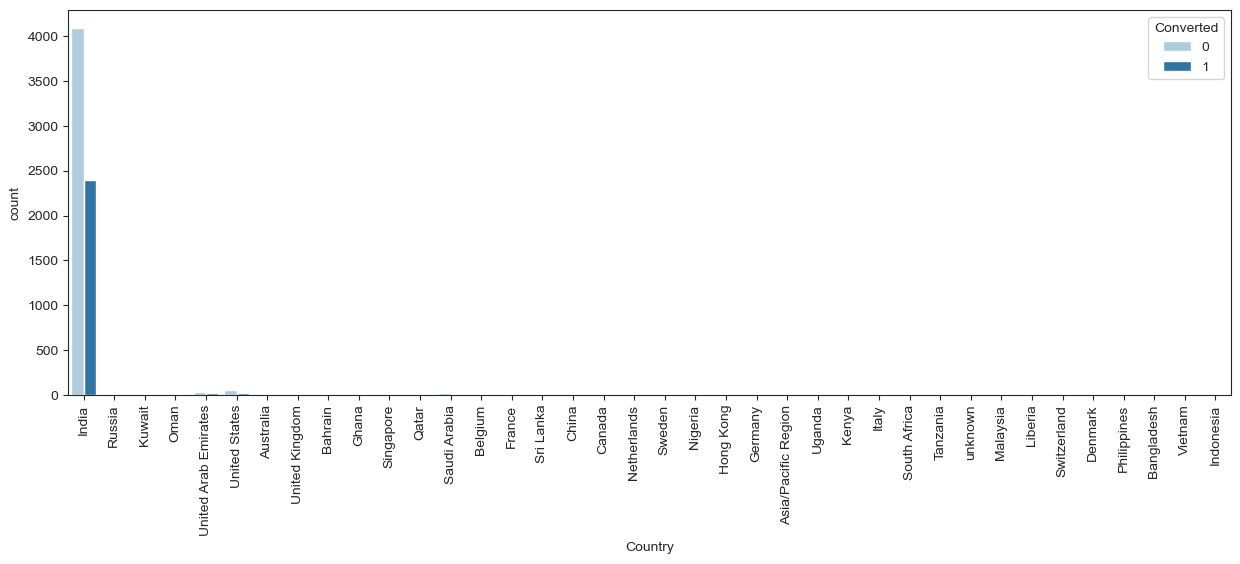

In [17]:
#visualising the spread of data in 'country' column

plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Country', hue='Converted', data=leadsdf, palette = 'Paired')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- Since 'India' is most in number in non-missing values, we impute the missing values with 'India'

In [18]:
#replace 'country' column missing data with most common datapoint ie 'India'

leadsdf['Country'] = leadsdf['Country'].replace(np.nan, 'India')

In [19]:
#checking the spread of data in 'country' column after data imputation

leadsdf['Country'].value_counts(dropna = False)

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

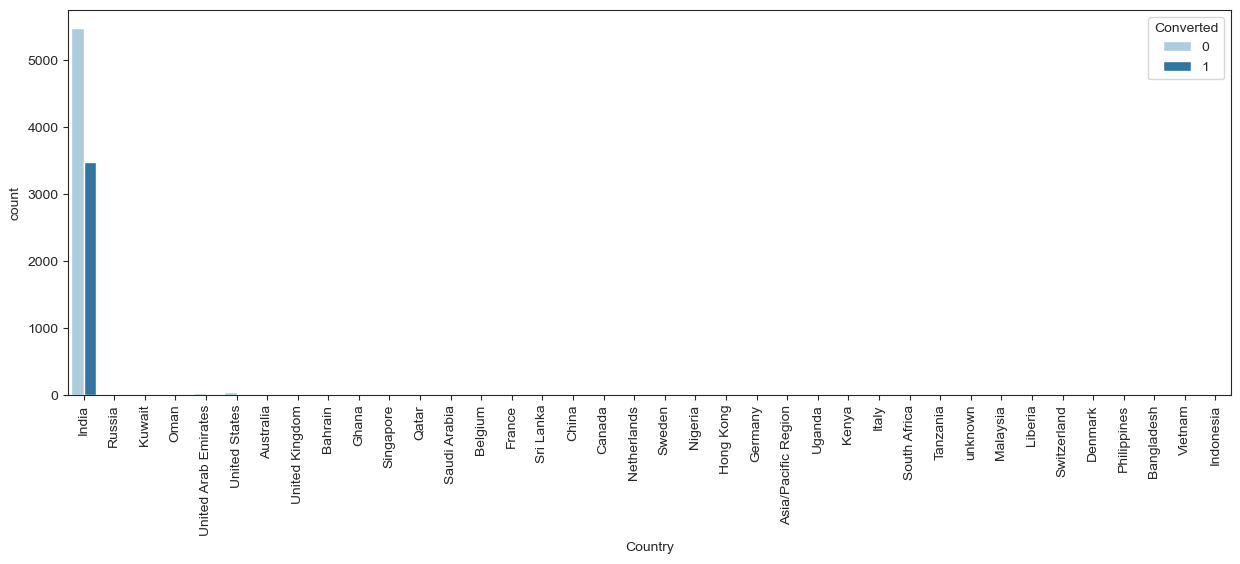

In [20]:
#visualising the spread of data in 'country' column after data imputation

plt.figure(figsize=(15,5))
plt1=sns.countplot(x='Country', hue='Converted', data=leadsdf, palette = 'Paired')
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- We see that number of values of 'India' is quite high (almost 98%) which indicates this data is highly skewed and will 
  influence the model incorrectly hence this column will be dropped towards the end of this analysis.

#### 2. Analysing 'City' column

In [21]:
#checking all value counts of 'city' column including the NA values

leadsdf['City'].value_counts(dropna = False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

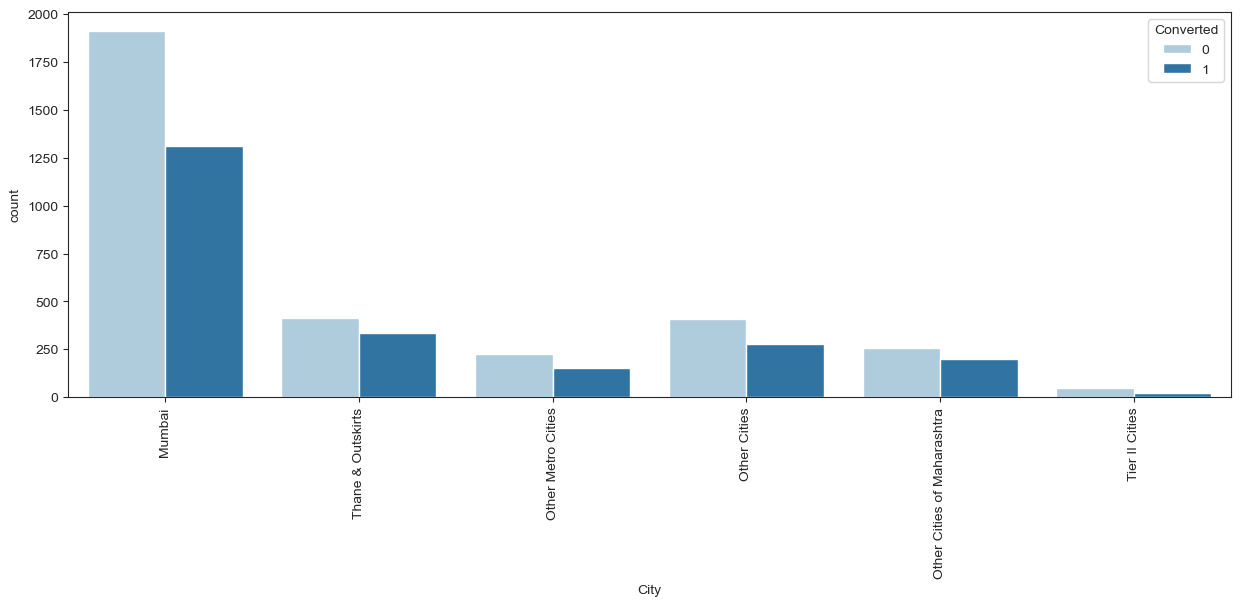

In [22]:
#visualising the spread of data in 'city' column

plt.figure(figsize=(15,5))
plt2=sns.countplot(x='City', hue='Converted', data=leadsdf, palette = 'Paired')
plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- Since 'Mumbai' is most in number in non-missing values, we impute the missing values with 'Mumbai'

In [23]:
#replace 'city' column missing data with most common datapoint ie 'Mumbai'

leadsdf['City'] = leadsdf['City'].replace(np.nan, 'Mumbai')

In [24]:
#checking the spread of data in 'city' column after data imputation

leadsdf['City'].value_counts(dropna = False)

City
Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

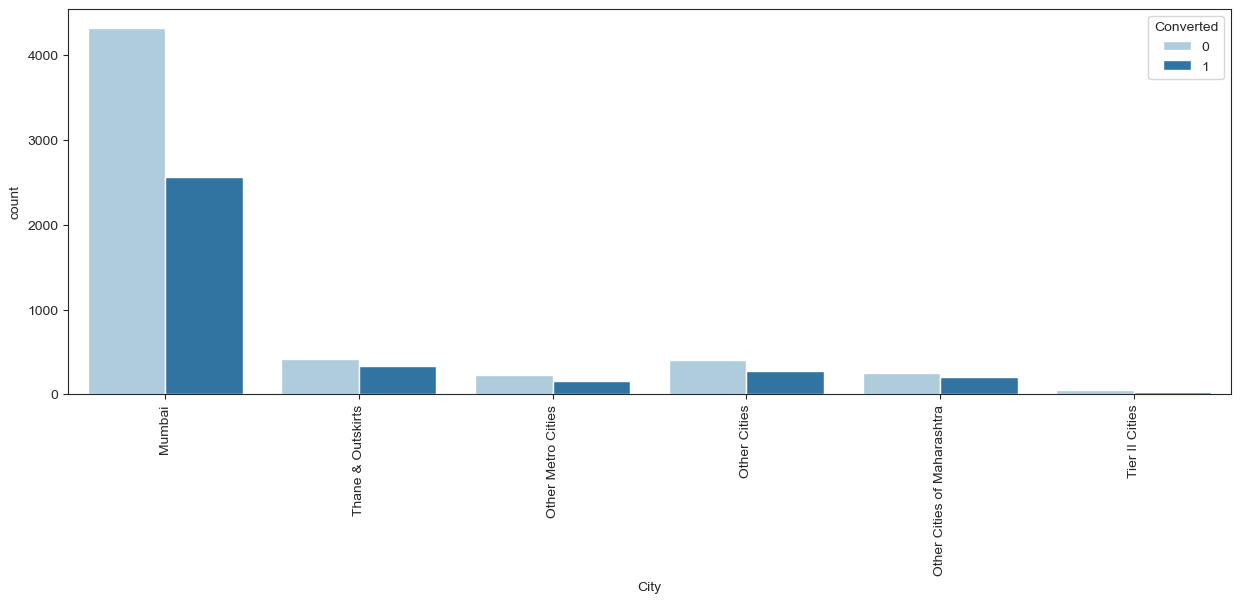

In [25]:
#visualising the spread of data in 'city' column after data imputation

plt.figure(figsize=(15,5))
plt2=sns.countplot(x='City', hue='Converted', data=leadsdf, palette = 'Paired')
plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- The data of this column are not too highly skewed and hence we shall retain this column for analysis

#### 3. Analysing 'Specialization' column

In [25]:
#checking all value counts of 'specialization' column including the NA values

leadsdf['Specialization'].value_counts(dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

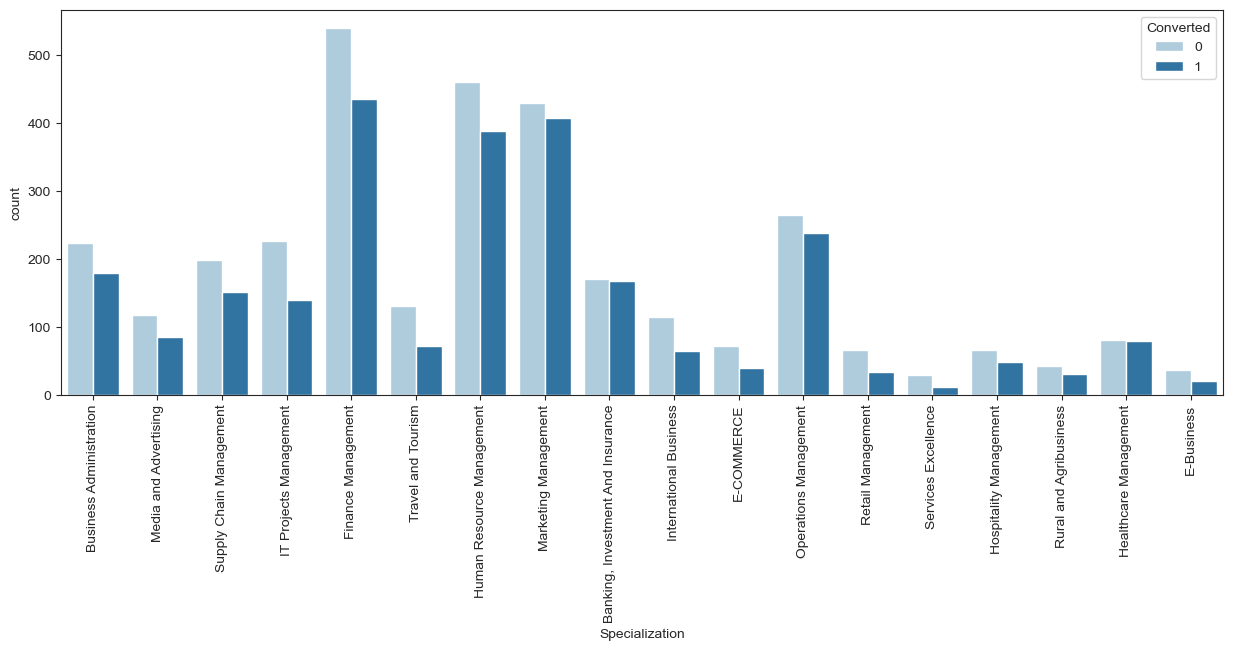

In [26]:
#visualising the spread of data in 'specialization' column

plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=leadsdf, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

In [15]:
#Leads may not have mentioned their specializations because they either might still be students or their chosen specialization was not in list.
#Hence it will be better to replace NA values with the term 'Not Specified'

In [27]:
#replacing 'specialization' column missing data with 'not specified'

leadsdf['Specialization'] = leadsdf['Specialization'].replace(np.nan, 'Not Specified')

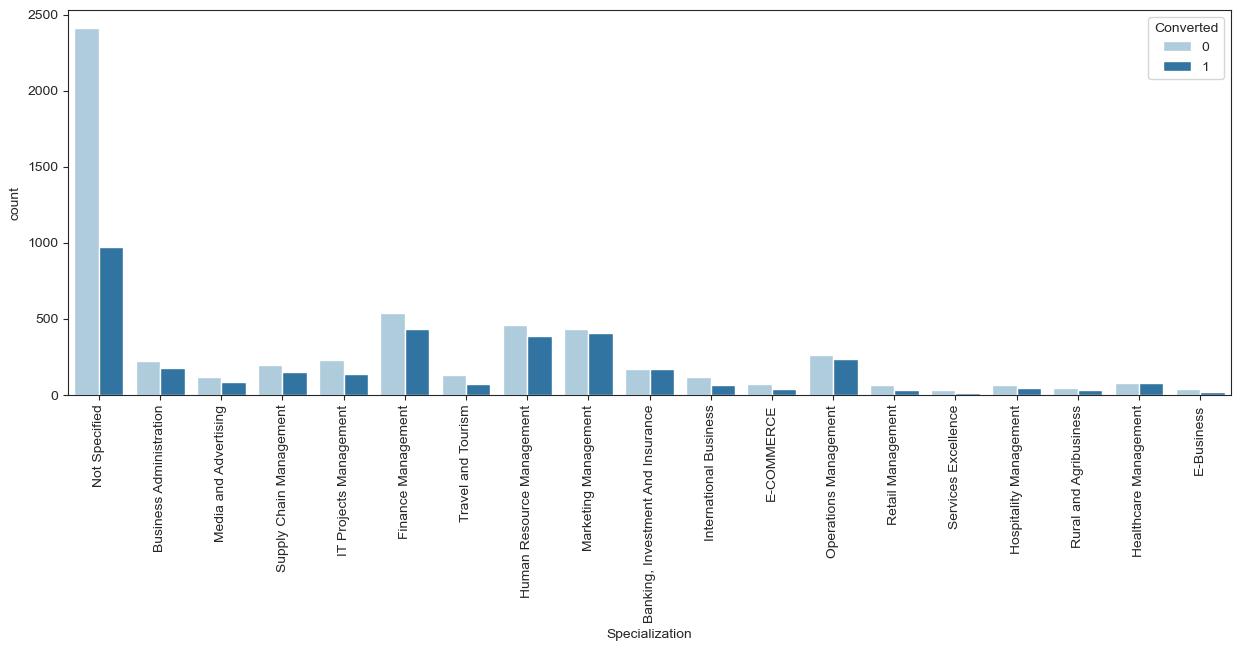

In [28]:
#visualising the spread of data in 'specialization' column after data correction

plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=leadsdf, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- We see that leads having different types of 'Management' specializations are more in number as well as have higher chances
  of getting converted. Hence we combine all the different 'management' specialization under one term 
  'Management Specialization'

In [29]:
#combining different management branches under one specialization

leadsdf['Specialization'] = leadsdf['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [30]:
#checking the spread of data in 'specialization' column after data correction

leadsdf['Specialization'].value_counts(dropna = False)

Specialization
Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

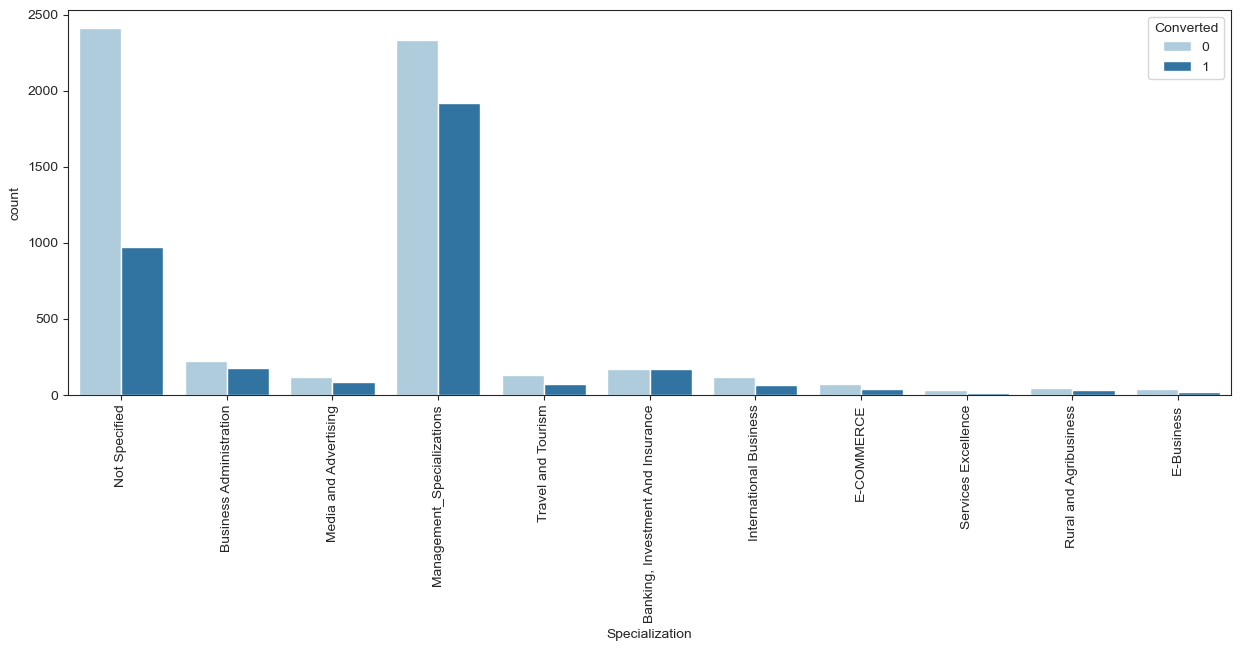

In [31]:
#visualising the spread of data in 'specialization' column after data correction

plt.figure(figsize=(15,5))
plt3=sns.countplot(x='Specialization', hue='Converted', data=leadsdf, palette = 'Paired')
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

In [16]:
# Sort the dataframe by 'Lead Source' in ascending order

fig = px.histogram(leadsdf, x="Specialization", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=500
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

Conclusion:
- This is a very significant variable as we can see the choice of specialization is a big influencer for lead conversion hence
  this column will be retained.

#### Analysing 'What is your current occupation' column

In [33]:
#checking all value counts of 'What is your current occupation' column including the NA values

leadsdf['What is your current occupation'].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

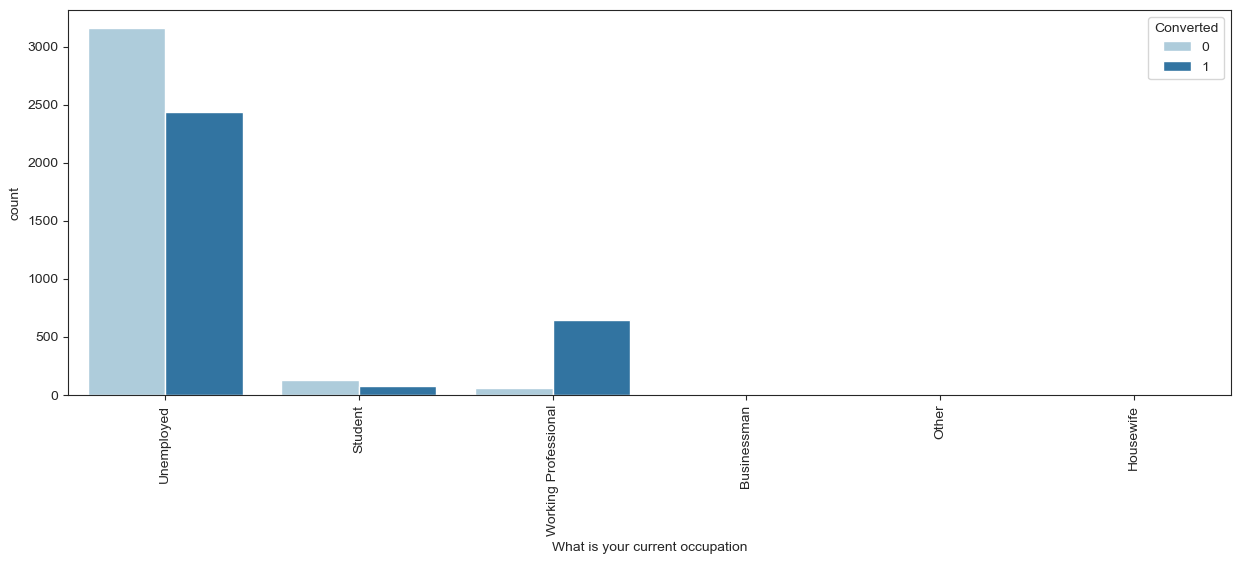

In [34]:
#visualising the spread of data in 'What is your current occupation' column

plt.figure(figsize=(15,5))
plt4=sns.countplot(x='What is your current occupation', hue='Converted', data=leadsdf, palette = 'Paired')
plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#replace 'What is your current occupation' column missing data with most common datapoint ie 'Unemployed'

leadsdf['What is your current occupation'] = leadsdf['What is your current occupation'].replace(np.nan, 'Unemployed')

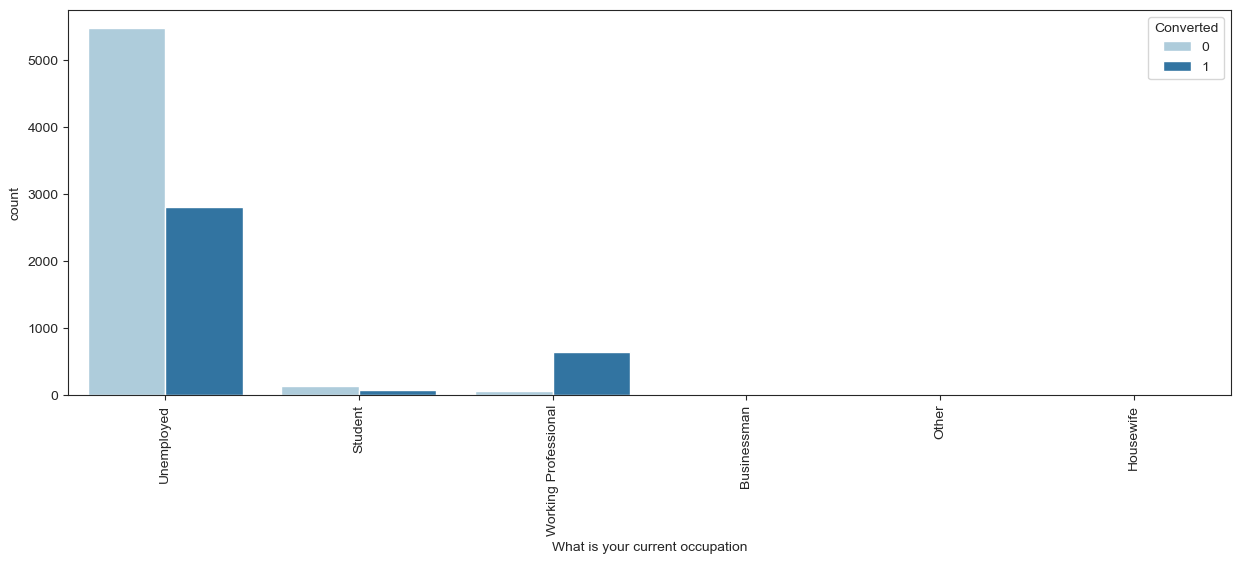

In [36]:
#visualising the spread of data in 'What is your current occupation' column after data imputation

plt.figure(figsize=(15,5))

plt4=sns.countplot(x='What is your current occupation', hue='Converted', data=leadsdf, palette = 'Paired')
plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
plt.show()

#Although data may look skewed in favour of 'Unemployed' leads, we also identify a very interesting trend: leads who are 
  'working professionals' are more likely to get converted. Hence we shall retain this column.


#### Analysing 'What matters most to you in choosing a course' column

In [37]:
#checking all value counts of 'What matters most to you in choosing a course' column including the NA values

leadsdf['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [38]:
#replace 'What matters most to you in choosing a course' column missing data with most common datapoint ie 'Better Career Prospects'

leadsdf['What matters most to you in choosing a course'] = leadsdf['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [39]:
#checking the spread of data in 'What matters most to you in choosing a course' column after data imputation

leadsdf['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

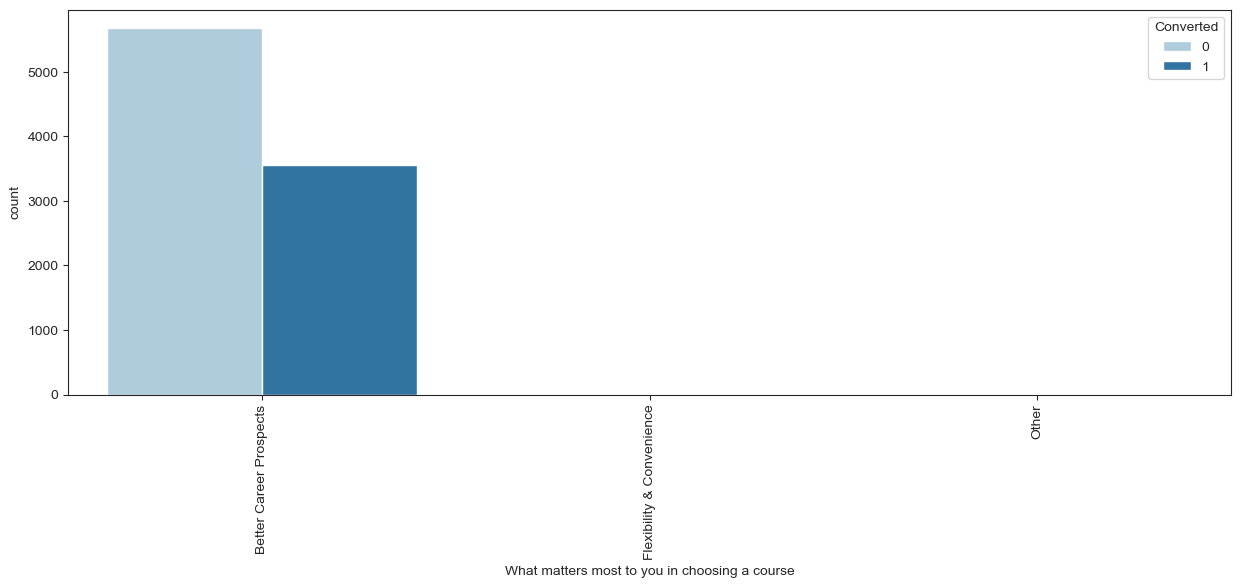

In [40]:
#visualising the spread of data in 'What matters most to you in choosing a course' column after data imputation

plt.figure(figsize=(15,5))
plt5=sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leadsdf, palette = 'Paired')
plt5.set_xticklabels(plt5.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- Almost 99% of data is skewed towards 'Better Career Prospect' and hence this column will be dropped towards the end of this analysis

#### Analysing 'Tags' column

In [41]:
#checking all value counts of 'tags' column including the NA values

leadsdf.Tags.value_counts(dropna = False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [ ]:
# Once again there may be many different reasons why a lead has not been tagged. Also the data is not heavily imbalanced enough to impute with most common datapoint.
# Hence we replace NA values with 'not specified'

In [42]:
#replace 'tags' column missing data with the term 'not specified'

leadsdf['Tags'] = leadsdf['Tags'].replace(np.nan, 'Not Specified')

In [43]:
#checking the spread of data in 'tags' column after data correction

leadsdf.Tags.value_counts(dropna = False)

Tags
Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

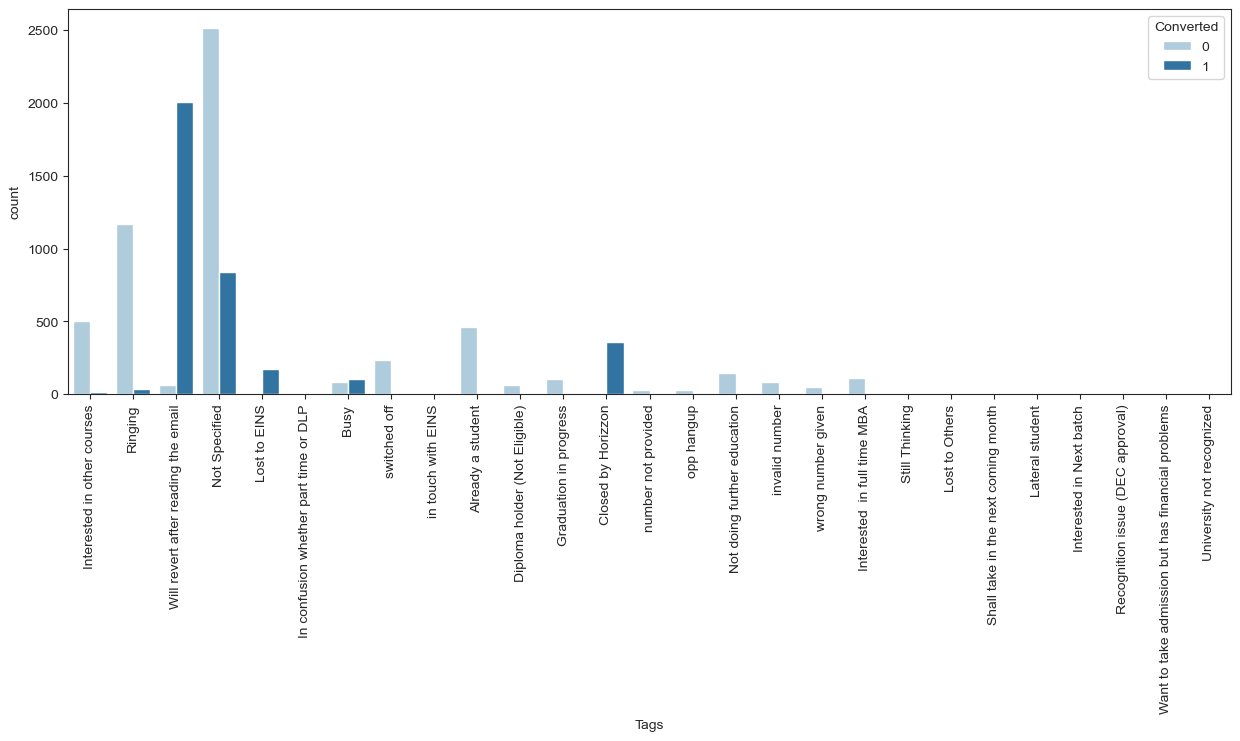

In [44]:
#visualising the spread of data in 'tags' column after data correction

plt.figure(figsize=(15,5))
plt6=sns.countplot(x='Tags', hue='Converted', data=leadsdf, palette = 'Paired')
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- Leads tagged 'Will revert after reading mail' have highest chances of being converted followed by 'Lost To EINS', 'Closed By Horizon and 'Busy'
- But there is a lot of data with very low frequence and hence of we club them under one single term like 'Other_Tags' we will be able to read the spread better.


In [45]:
#replace 'tags' column low frequency data with term 'Other_Tags'

leadsdf['Tags'] = leadsdf['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

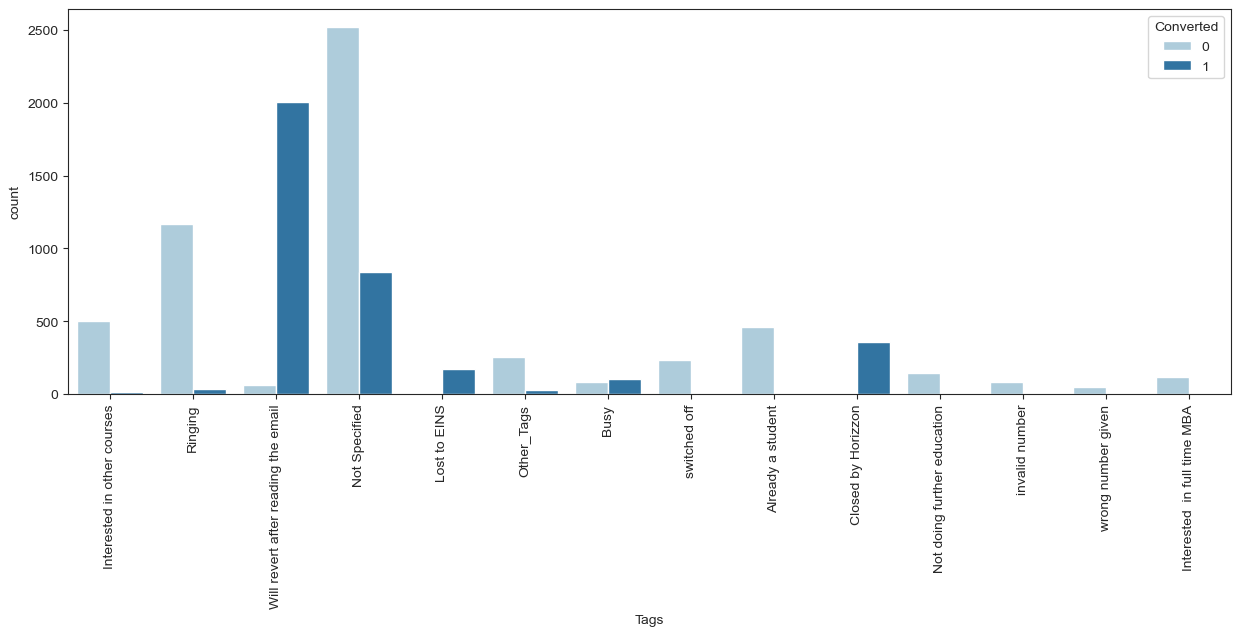

In [46]:
#visualising the spread of data in 'tags' column after data clubbing

plt.figure(figsize=(15,5))
plt6=sns.countplot(x='Tags', hue='Converted', data=leadsdf, palette = 'Paired')
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

##### Still a few more of the data points can be clubbed under Other_Tags column which are showing low frequency to improve the visualization spread

In [47]:
#replace 'tags' column low frequency data with term 'Other_Tags'

leadsdf['Tags'] = leadsdf['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

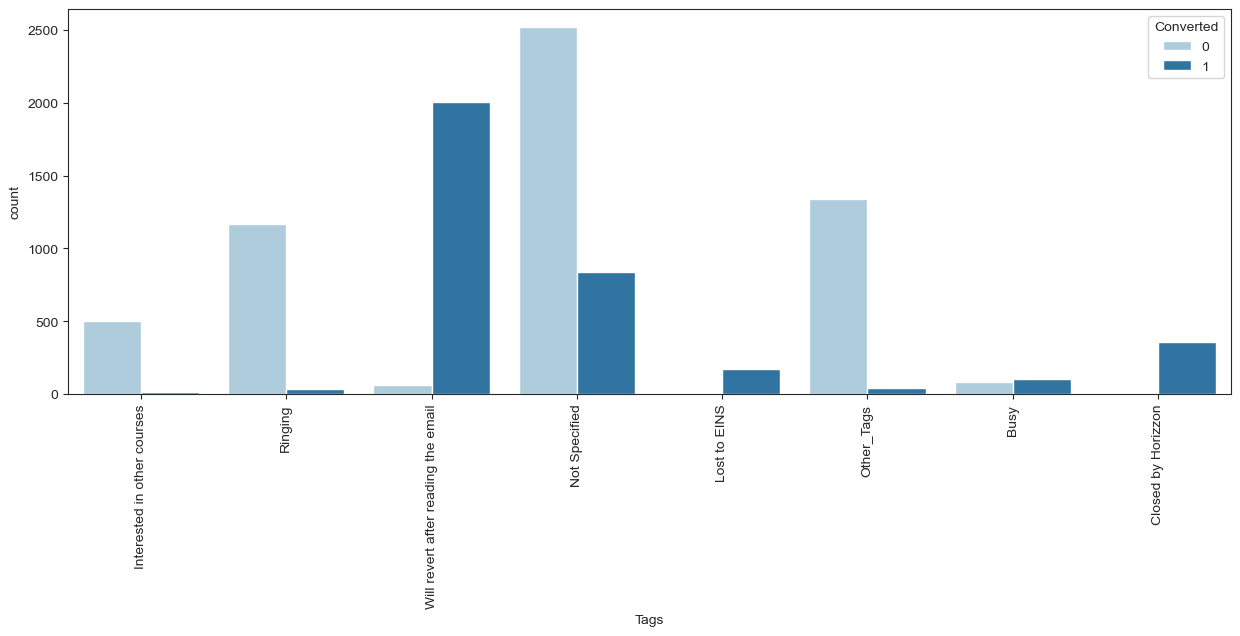

In [48]:
#visualising the spread of data in 'tags' column after data clubbing

plt.figure(figsize=(15,5))
plt6=sns.countplot(x='Tags', hue='Converted', data=leadsdf, palette = 'Paired')
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

In [17]:
# Sort the dataframe by 'Lead Source' in ascending order

fig = px.histogram(leadsdf, x="Tags", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=500
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

#
- Leads tagged 'Will revert after reading mail' have highest chances of being converted followed by 'Lost To EINS', 'Closed By Horizon and 'Busy' and efforts should be made to generate more leads from these tags.
- 'Ringing' and 'Not Specified' tagged leads are more in number and hence efforts should be made to maximise conversion from these tags.

#### Analysing 'Lead Source' column

In [50]:
#checking all value counts of 'Lead Source' column including the NA values

leadsdf['Lead Source'].value_counts(dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [ ]:
# Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Others' along with the missing values as well as they are low in number.
# Certain datapoints like 'google' and 'Google' which are same and 'Facebook' and 'Social Media' which are similar have also been clubbed together.

In [51]:
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace(['bing',
                                      'Click2call',
                                       'Press_Release',
                                       'Live Chat',
                                       'youtubechannel',
                                       'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog',
                                                   'NC_EDM'] , 'Others')
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace(['google'], 'Google')
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace(['Facebook'], 'Social Media')
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace(np.nan, 'Others')

In [52]:
#checking the spread of data in 'Lead Source' column after data imputation

leadsdf['Lead Source'].value_counts(dropna = False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: count, dtype: int64

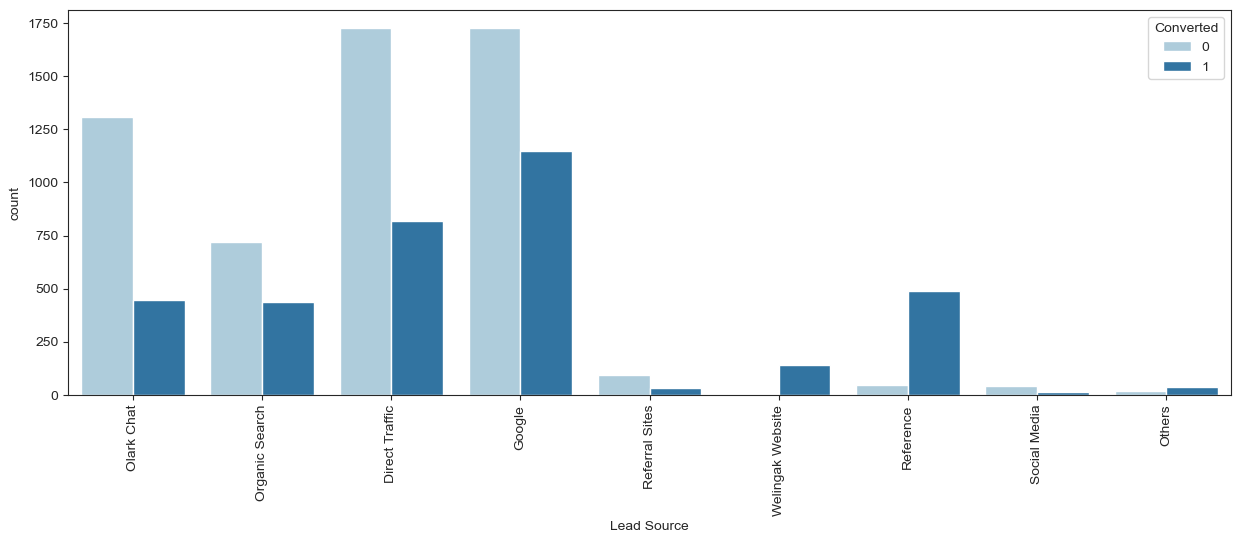

In [53]:
#visualising the spread of data in 'Lead Source' column after data imputation

plt.figure(figsize=(15,5))
plt7=sns.countplot(x='Lead Source', hue='Converted', data=leadsdf, palette = 'Paired')
plt7.set_xticklabels(plt7.get_xticklabels(),rotation=90)
plt.show()

In [18]:
# Sort the dataframe by 'Lead Source' in ascending order
leadsdf_sorted = leadsdf.sort_values('Lead Source')

fig = px.histogram(leadsdf_sorted, x="Lead Source", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=500
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

Conclusion:
- 'Google' and 'Direct Traffic' generate most amount of leads and lead conversions while some like 'Welingak Website', 'Reference' and 'Others' are having maximum conversion of leads. This is a very significant column hence we shall retain it.
- To improve overall lead conversion rate, focus should be on improving lead converion of 'direct traffic' and 'google leads' and efforts should be put to generate more leads from 'reference' and 'welingak website' as they are conversion rate is very strong.

#### Analysing 'Last Activity' column

In [55]:
#checking all value counts of 'Last Activity' column including the NA values

leadsdf['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [ ]:
# Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Other_Tags' along with the missing values as well as they are low in number.

In [56]:
leadsdf['Last Activity'] = leadsdf['Last Activity'].replace(['Unreachable',
                                      'Unsubscribed',
                                       'Had a Phone Conversation',
                                       'Approached upfront',
                                       'View in browser link Clicked',
                                       'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 
                                                             'Resubscribed to emails'] , 'Other_Tags')
leadsdf['Last Activity'] = leadsdf['Last Activity'].replace(np.nan, 'Other_Tags')

In [57]:
#checking the spread of data in 'Last Activity' column after data imputation

leadsdf['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other_Tags                    308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

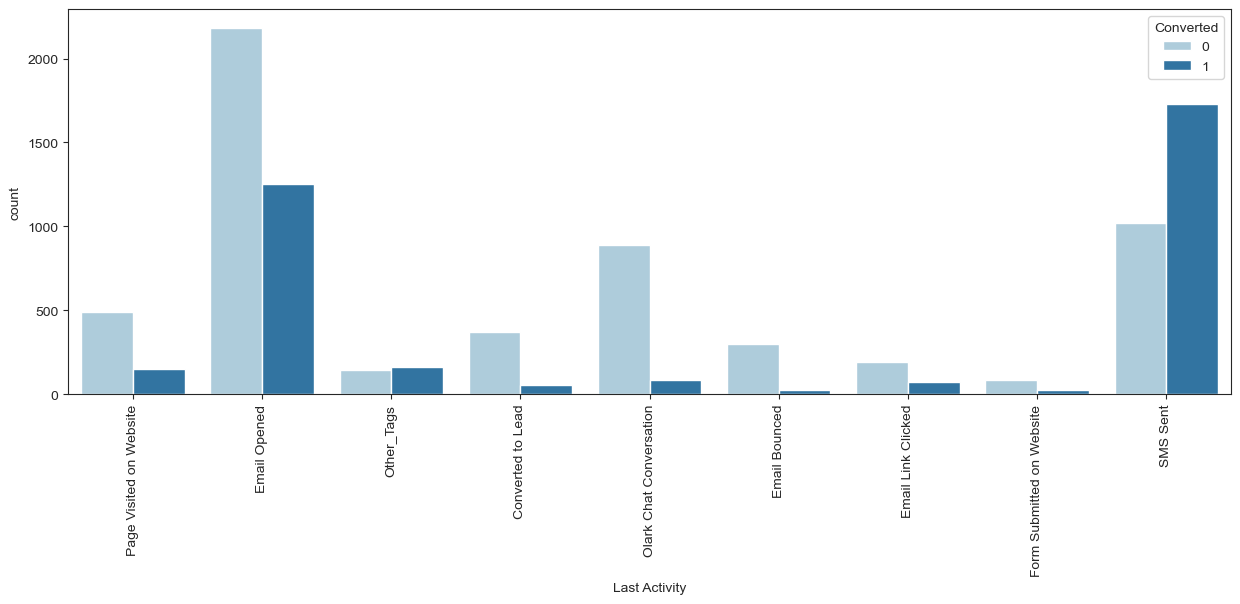

In [58]:
#visualising the spread of data in 'Last Activity' column after data imputation

plt.figure(figsize=(15,5))
plt8=sns.countplot(x='Last Activity', hue='Converted', data=leadsdf, palette = 'Paired')
plt8.set_xticklabels(plt8.get_xticklabels(),rotation=90)
plt.show()

In [19]:
# Sort the dataframe by 'Lead Source' in ascending order
leadsdf_sorted = leadsdf.sort_values('Last Activity')

fig = px.histogram(leadsdf_sorted, x="Last Activity", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=400
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

Conclusion:
- This is another significant column which should be retained as we can clearly see that for leads having last activity as 'SMS Sent' have the most conversion rate.
- 'Email Opened' brings maximum no.of leads and has second most conversion as well.

#### Analysing 'Lead Origin' column

In [60]:
#checking all value counts of 'Lead Origin' column including the NA values

leadsdf['Lead Origin'].value_counts(dropna = False)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

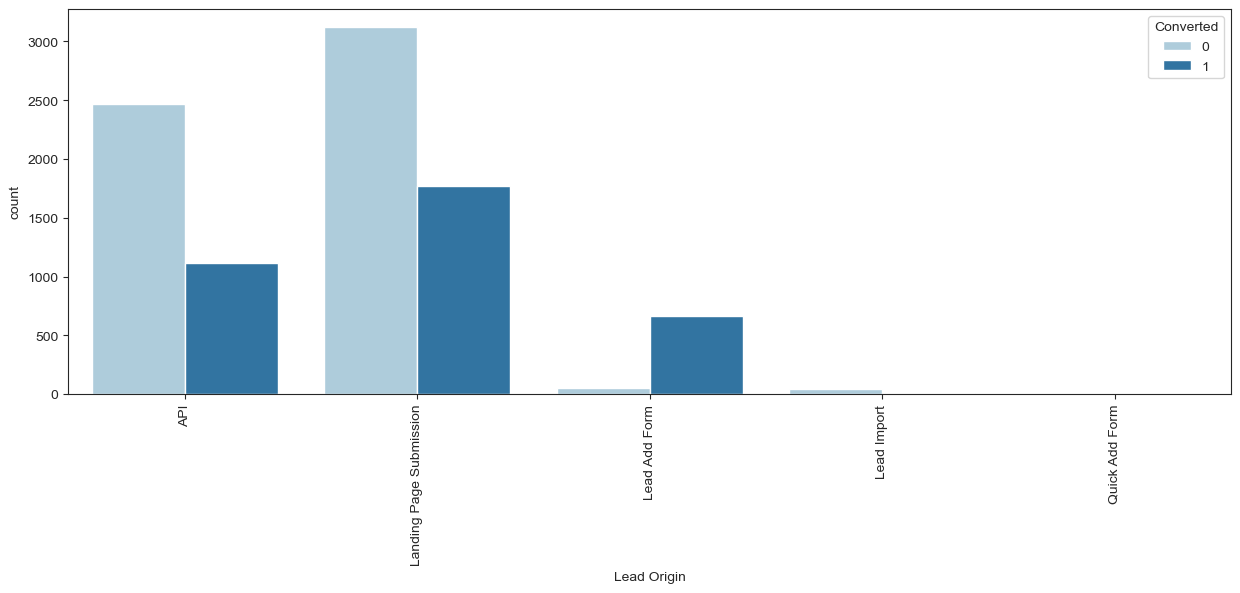

In [61]:
#visualising the spread of data in 'Lead Origin' column

plt.figure(figsize=(15,5))
plt9=sns.countplot(x='Lead Origin', hue='Converted', data=leadsdf, palette = 'Paired')
plt9.set_xticklabels(plt9.get_xticklabels(),rotation=90)
plt.show()

In [20]:
# Sort the dataframe by 'Lead Source' in ascending order
leadsdf_sorted = leadsdf.sort_values('Lead Origin')

fig = px.histogram(leadsdf_sorted, x="Lead Origin", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=400
)

# Rotate x-axis labels
# fig.update_xaxes(tickangle=-35)
fig.update_xaxes(tickangle=0)

# Show the figure
fig.show()

Conclusion:
- This is another very significant column as we can see that 'Lead Add Form' is a very good origin of leads due to its very strong conversion rate.
- 'Landing Page Submissions' and 'API' bring a higher amount of leads and see more lead conversion as well.
- Lead Import and Quick Add Form get very few leads.
- To improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Analysing 'Do Not Email' column

In [65]:
#checking all value counts of 'Do Not Email' column

leadsdf['Do Not Email'].value_counts(dropna = False)

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

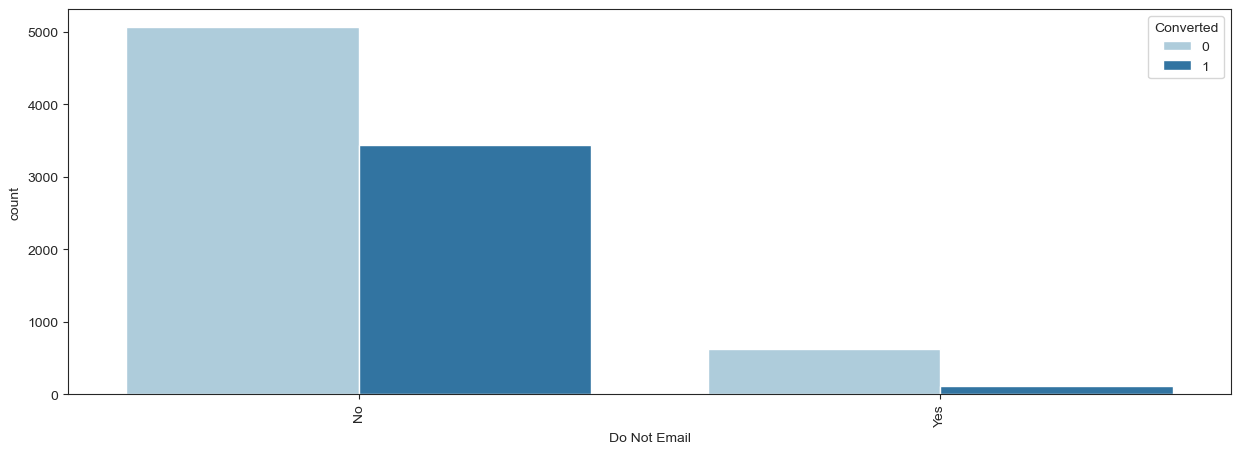

In [66]:
#visualising the spread of data in 'Do Not Email' column

plt.figure(figsize=(15,5))
plt10=sns.countplot(x='Do Not Email', hue='Converted', data=leadsdf, palette = 'Paired')
plt10.set_xticklabels(plt10.get_xticklabels(),rotation=90)
plt.show()

In [21]:
# Sort the dataframe by 'Lead Source' in ascending order
leadsdf_sorted = leadsdf.sort_values('Do Not Email')

fig = px.histogram(leadsdf_sorted, x="Do Not Email", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=400
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

####  Analysing 'Do Not Call' column

In [68]:
#checking all value counts of 'Do Not Call' column

leadsdf['Do Not Call'].value_counts(dropna = False)

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

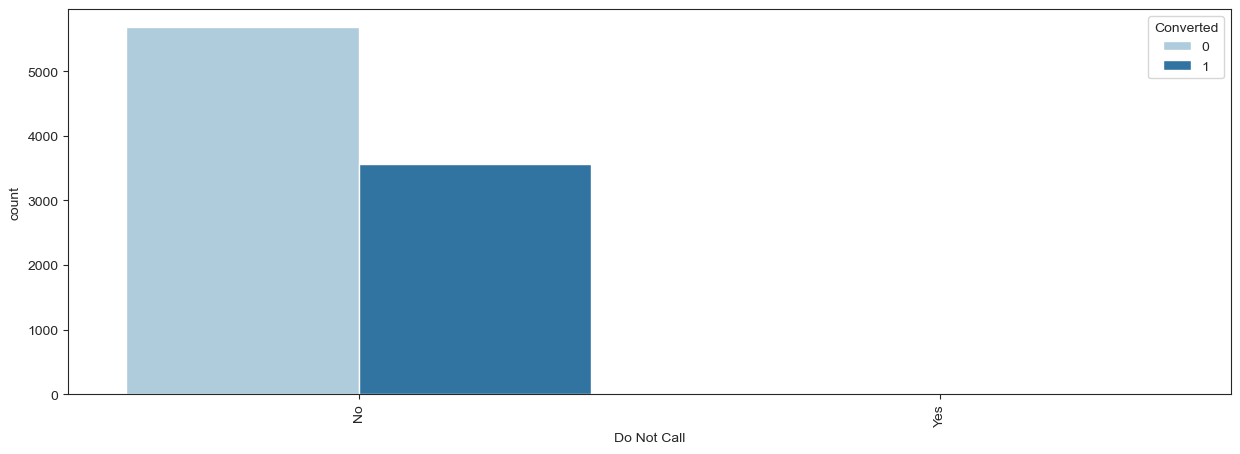

In [69]:
#visualising the spread of data in 'Do Not Call' column

plt.figure(figsize=(15,5))
plt11=sns.countplot(x='Do Not Call', hue='Converted', data=leadsdf, palette = 'Paired')
plt11.set_xticklabels(plt11.get_xticklabels(),rotation=90)
plt.show()

#
- 'Do Not Mail' column will be retained due to its better spread of data but 'Do Not Call' column will be dropped at the end of this analysis due to highly skewed data spread.

####  Analysing 'A free copy of Mastering The Interview' Column

In [70]:
#checking all value counts of 'A free copy of Mastering The Interview' column

leadsdf['A free copy of Mastering The Interview'].value_counts(dropna = False)

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

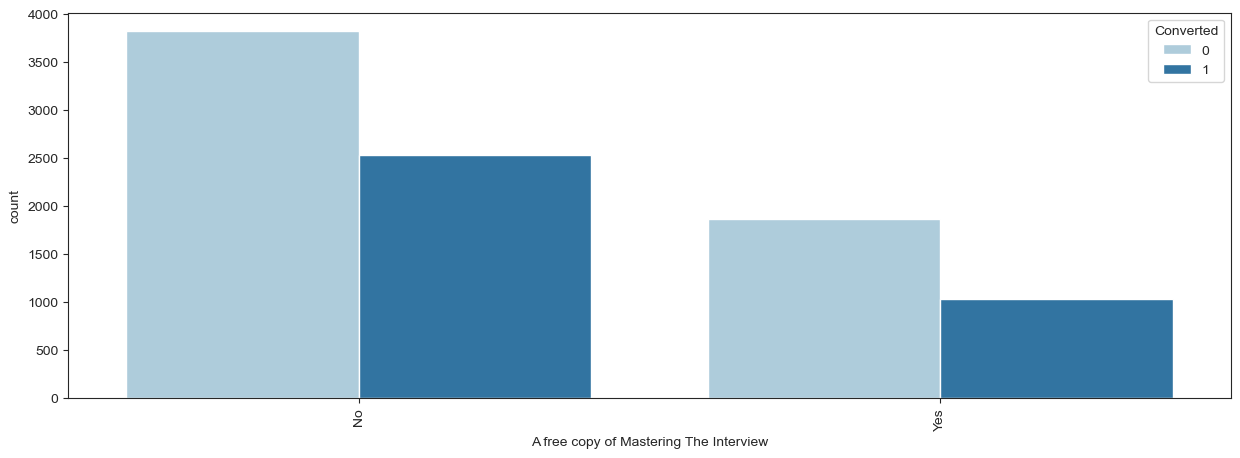

In [71]:
#visualising the spread of data in 'A free copy of Mastering The Interview' column

plt.figure(figsize=(15,5))
plt12=sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leadsdf, palette = 'Paired')
plt12.set_xticklabels(plt12.get_xticklabels(),rotation=90)
plt.show()

Conclusion:
- Since the data is not highly skewed we shall retain this column.


#### Analysing 'Last Notable Activity' column

In [72]:
#checking all value counts of 'Last Notable Activity' column 

leadsdf['Last Notable Activity'].value_counts(dropna = False)

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [ ]:
# Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Others' .

In [73]:
leadsdf['Last Notable Activity'] = leadsdf['Last Notable Activity'].replace(['Email Bounced',
                                      'Unsubscribed',
                                       'Unreachable',
                                       'Had a Phone Conversation',
                                       'Email Marked Spam',
                                       'Approached upfront', 'Resubscribed to emails','View in browser link Clicked', 'View in browser link Clicked',
                                       'Form Submitted on Website', 'Email Received'] , 'Others')


#checking the spread of data in 'Last Notable Activity' column after data imputation

leadsdf['Last Notable Activity'].value_counts(dropna = False)

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: count, dtype: int64

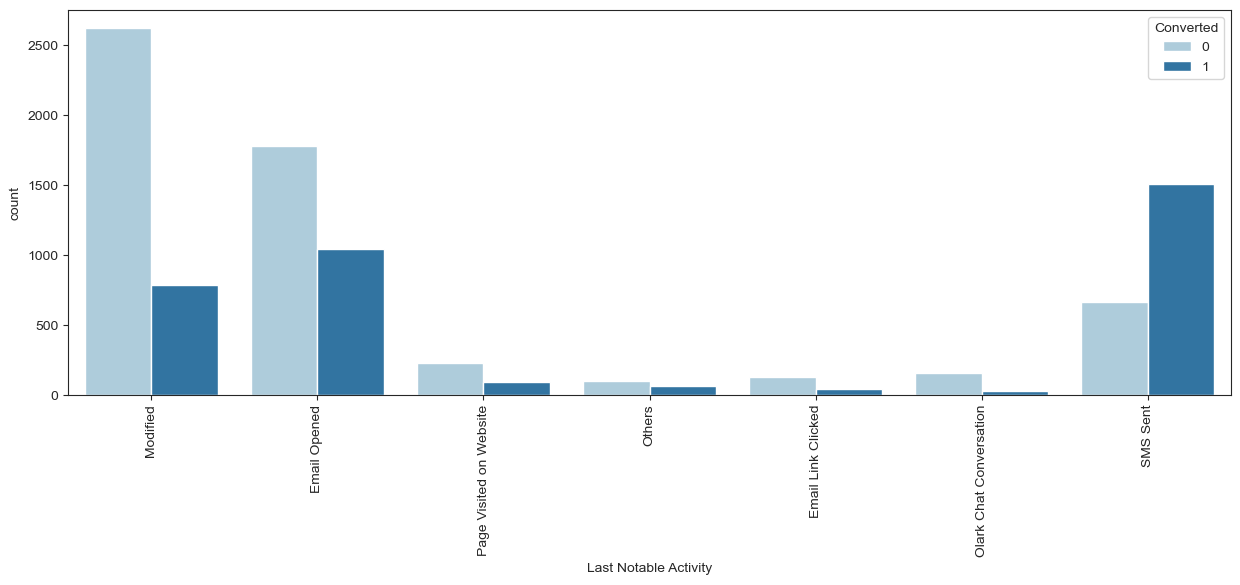

In [74]:
#visualising the spread of data in 'Last Notable Activity' column after data imputation

plt.figure(figsize=(15,5))
plt13=sns.countplot(x='Last Notable Activity', hue='Converted', data=leadsdf, palette = 'Paired')
plt13.set_xticklabels(plt13.get_xticklabels(),rotation=90)
plt.show()

In [22]:
# Sort the dataframe by 'Lead Source' in ascending order
leadsdf_sorted = leadsdf.sort_values('Last Notable Activity')

fig = px.histogram(leadsdf_sorted, x="Last Notable Activity", color="Converted", color_discrete_sequence=px.colors.qualitative.Pastel)

# Set the figure size
fig.update_layout(
    width=1000,
    height=400
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=-35)

# Show the figure
fig.show()

#
- This is another significant column which should be retained as we can clearly see that for leads having last notable activity as 'SMS Sent' have a very high conversion rate.

####  Analysing The Remaining Categorical Columns

In [76]:
#checking all value counts of 'Search' column

leadsdf['Search'].value_counts(dropna = False)

Search
No     9226
Yes      14
Name: count, dtype: int64

In [77]:
#checking all value counts of 'Magazine' column

leadsdf['Magazine'].value_counts(dropna = False)

Magazine
No    9240
Name: count, dtype: int64

In [78]:
#checking all value counts of 'Newspaper Article' column

leadsdf['Newspaper Article'].value_counts(dropna = False)

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [79]:
#checking all value counts of 'X Education Forums' column

leadsdf['X Education Forums'].value_counts(dropna = False)

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [80]:
#checking all value counts of 'Newspaper' column

leadsdf['Newspaper'].value_counts(dropna = False)

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [81]:
#checking all value counts of 'Digital Advertisement' column

leadsdf['Digital Advertisement'].value_counts(dropna = False)

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [82]:
#checking all value counts of 'Receive More Updates About Our Courses' column

leadsdf['Receive More Updates About Our Courses'].value_counts(dropna = False)

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [83]:
#checking all value counts of 'Update me on Supply Chain Content' column

leadsdf['Update me on Supply Chain Content'].value_counts(dropna = False)

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [84]:
#checking all value counts of 'Get updates on DM Content' column

leadsdf['Get updates on DM Content'].value_counts(dropna = False)

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [85]:
#checking all value counts of 'I agree to pay the amount through cheque' column

leadsdf['I agree to pay the amount through cheque'].value_counts(dropna = False)

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

#
- As we can see the above few columns have highly skewed data and hence it will be better to drop these columns from our analysis.

In [ ]:
# Lets check the percentage of missing values in the data now as we have performed data imputation on missing values in multiple columns

In [86]:
#checking percentage of missing values in dataset

round(100*(leadsdf.isnull().sum())/len(leadsdf.index), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [ ]:
# As we can see most of the columns have no missing columns and only 2 columns ahve about 1.5% missing values each which are highly insignificant and hence can be dropped altogether.

In [87]:
#dropping the remaining missing values as they are very less and insignificant in number

leadsdf = leadsdf.dropna()

In [88]:
# again checking the percentage of missing values

round(100*(leadsdf.isnull().sum())/len(leadsdf.index), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

##### As we can see, our dataset has no missing values.

In [89]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 non-n

##### Now it is time to drop the categorical columns from our analysis above which had very highly skewed data.

In [90]:
#extracting and dropping the highly skewed data columns

cols_to_be_dropped = ['Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
                     'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                     'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque', 'Do Not Call']

In [92]:
leadsdf = leadsdf.drop(cols_to_be_dropped,axis=1)

In [93]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   object 
 

##### Ultimately we are now left with only 10 categorical columns.

### Numerical Variables Analysis

#### 1. Analysing 'Converted' column

In [94]:
#checking the proportion of leads who were converted.

converted = (sum(leadsdf['Converted'])/len(leadsdf['Converted'].index))*100

converted

38.02043282434362

##### Analysing the correlation of various numerical variable using heatmap.

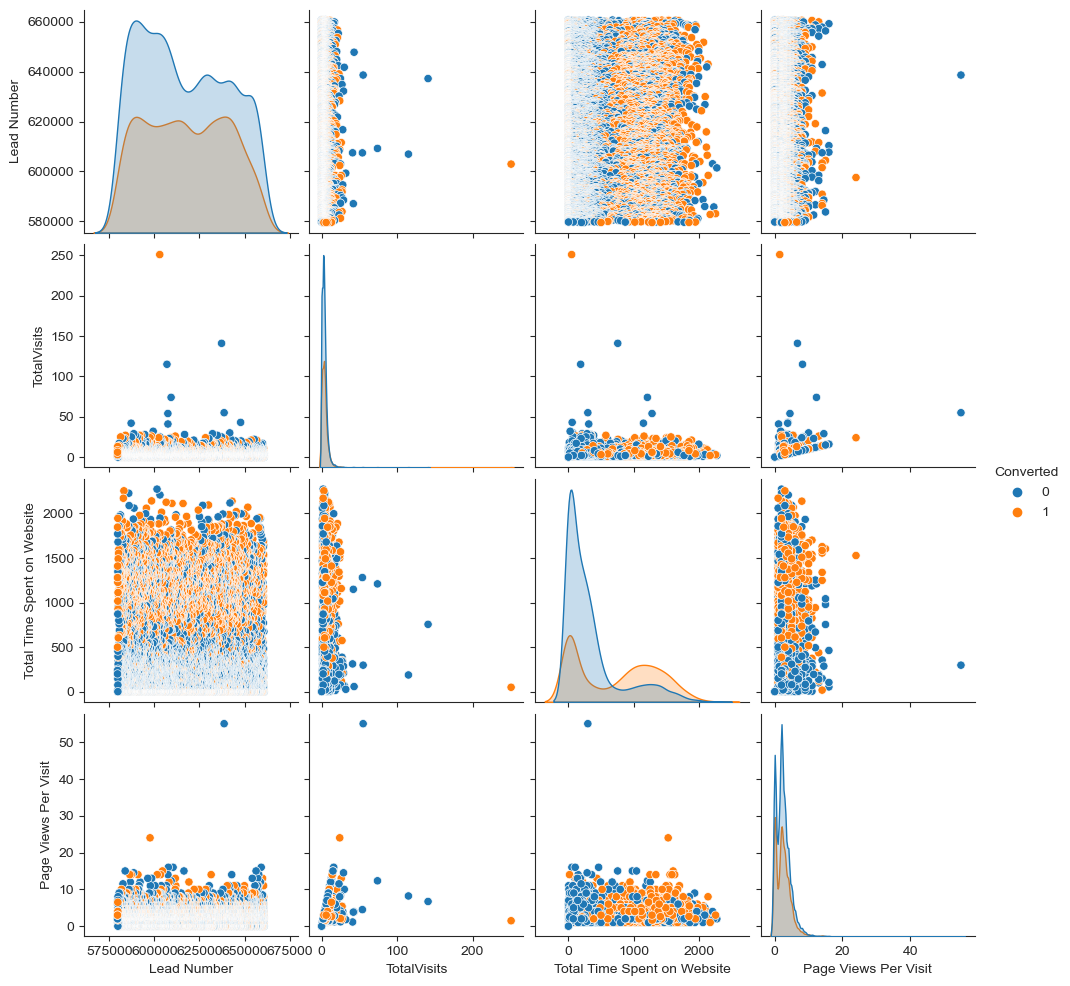

In [95]:
sns.pairplot(leadsdf, hue='Converted')
plt.show()

Conclusion:
- While there is not much to say about the correlation between these numeric variables, 'Total Visits' and 'Page Views Per Visit' have the most correlation with each other. We shall keep this in mind while building our model.

#### Analysing 'Total Visits', 'Page Views Per Visit' and 'Total Time Spent on Website' columns.

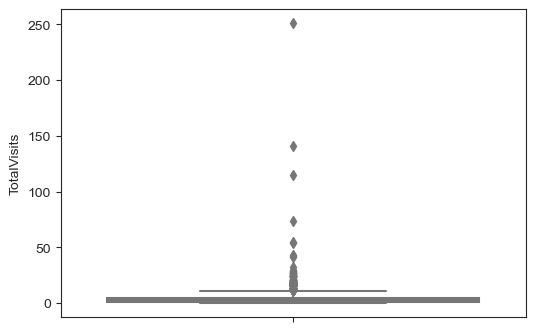

In [97]:
#visualising spread of 'total visits' column thorugh a boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=leadsdf['TotalVisits'], palette = 'Paired')
plt.show()

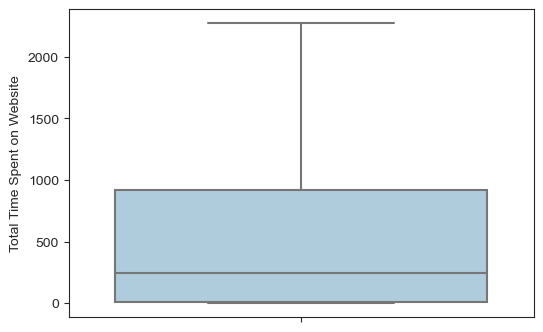

In [98]:
#visualising spread of 'Total Time Spent on Website' column thorugh a boxplot


plt.figure(figsize=(6,4))
sns.boxplot(y=leadsdf['Total Time Spent on Website'], palette = 'Paired')
plt.show()

<Figure size 800x600 with 0 Axes>

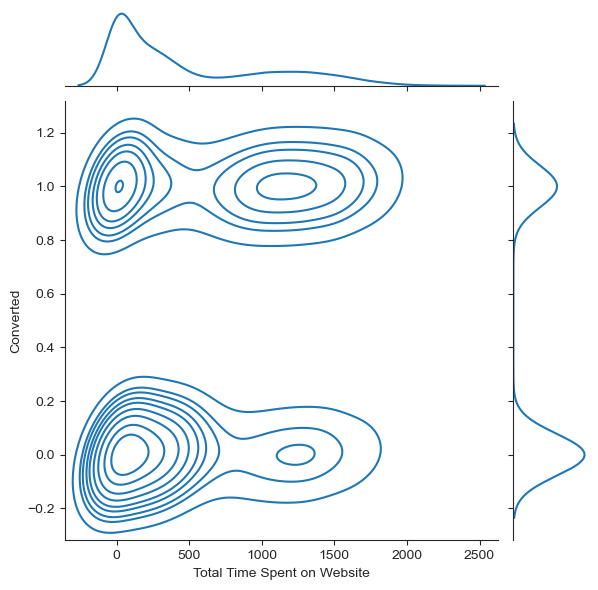

In [99]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=leadsdf["Total Time Spent on Website"], y=leadsdf.Converted, kind='kde')
plt.show()

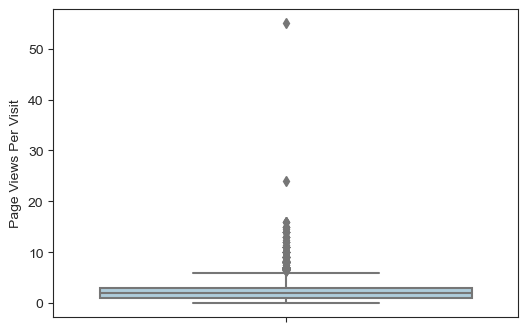

In [100]:
#visualising spread of 'Page Views Per Visit' column thorugh a boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=leadsdf['Page Views Per Visit'], palette = 'Paired')
plt.show()

Conclusion:
- The boxplot of 'Total Time Spent on Website' has no outliers.
- The boxplot of 'Page Views Per Visit' and 'Total Visits' have outliers and hence their percentiles must be investigated.

In [101]:
# checking the spread of percentiles of 'TotalVisits' column

leadsdf['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [102]:
# checking the spread of percentiles of 'Page Views Per Visit' column

leadsdf['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### As we can see, the difference between 99th percentile and max value and min value and 25th percentile is very high for both the columns.
##### Hence we shall drop the top and bottom 1% of datapoints to treat these outliers.

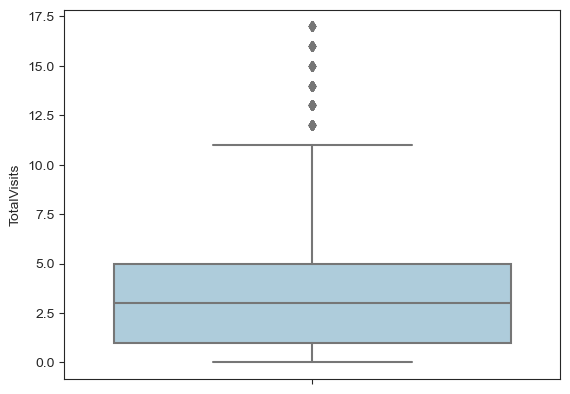

In [103]:
#dropping the top and bottom 1% datapoints to treat outliers and visualizing the spread of 'TotalVisits' column

Q_3 = leadsdf.TotalVisits.quantile(0.99)
leadsdf = leadsdf[(leadsdf.TotalVisits <= Q_3)]
Q_1 = leadsdf.TotalVisits.quantile(0.01)
leadsdf = leadsdf[(leadsdf.TotalVisits >= Q_1)]
sns.boxplot(y=leadsdf['TotalVisits'], palette = 'Paired')
plt.show()

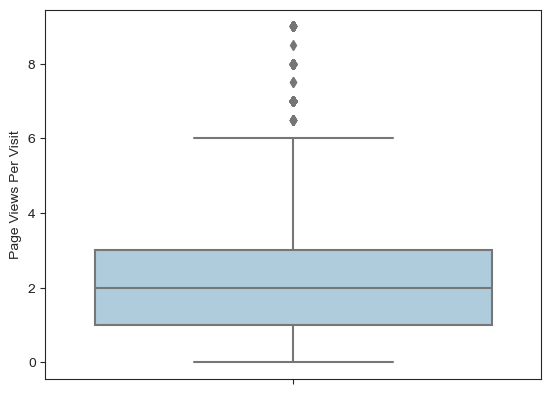

In [104]:
#dropping the top and bottom 1% datapoints to treat outliers and visualizing the spread of 'Page Views Per Visit' column

Q_3 = leadsdf['Page Views Per Visit'].quantile(0.99)
leadsdf = leadsdf[(leadsdf['Page Views Per Visit'] <= Q_3)]
Q_1 = leadsdf['Page Views Per Visit'].quantile(0.01)
leadsdf = leadsdf[(leadsdf['Page Views Per Visit'] >= Q_1)]
sns.boxplot(y=leadsdf['Page Views Per Visit'], palette = 'Paired')
plt.show()

##### Now we can visualise the box plot better and with lesser outliers.

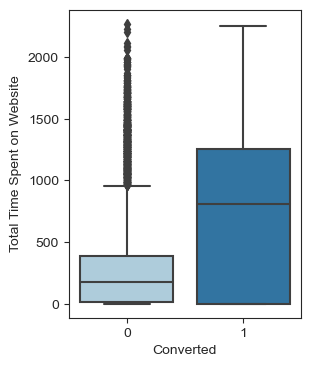

In [105]:
#visualising the spread of Converted vs Total Time Spent on Website

plt.figure(figsize=(3,4))
sns.boxplot(y=leadsdf['Total Time Spent on Website'], x=leadsdf['Converted'], palette = 'Paired')
plt.show()

In [24]:
fig = go.Figure()

# Add the box trace
fig.add_trace(
    go.Box(
        y=leadsdf['Total Time Spent on Website'],
        x=leadsdf['Converted'],
        boxpoints='all',
        marker_color='#3274A1'
    )
)

# Set the figure title and axis labels
fig.update_layout(
    title='Total Time Spent on Website vs Converted',
    xaxis=dict(title='Converted'),
    yaxis=dict(title='Total Time Spent on Website')
)

# Show the figure
fig.show()

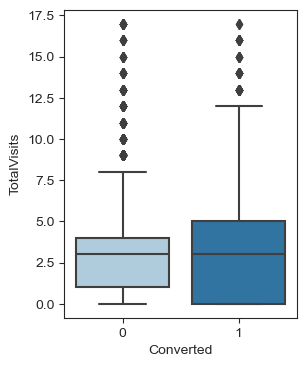

In [107]:
#visualising the spread of Converted vs Total Visits

plt.figure(figsize=(3,4))
sns.boxplot(y=leadsdf['TotalVisits'], x=leadsdf['Converted'], palette = 'Paired')
plt.show()

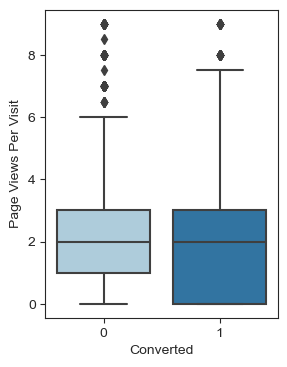

In [108]:
#visualising the spread of Converted vs Page Views Per Visit

plt.figure(figsize=(3,4))
sns.boxplot(y=leadsdf['Page Views Per Visit'], x=leadsdf['Converted'], palette = 'Paired')
plt.show()

Conclusion:
- From the above visualizations we observe that leads spending more time on website have higher chances of getting converted as we see the median is quite high for the Total Time Spent on Website vs Converted column.
- For the other two there is no conclusive evidence as the medians are same.

## Identifying Categorical Variables Columns and Creating Dummy Variables

###  Identifying Columns Having Categorical Variable

In [109]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8953 non-null   object 
 1   Lead Number                             8953 non-null   int64  
 2   Lead Origin                             8953 non-null   object 
 3   Lead Source                             8953 non-null   object 
 4   Do Not Email                            8953 non-null   object 
 5   Converted                               8953 non-null   int64  
 6   TotalVisits                             8953 non-null   float64
 7   Total Time Spent on Website             8953 non-null   int64  
 8   Page Views Per Visit                    8953 non-null   float64
 9   Last Activity                           8953 non-null   object 
 10  Specialization                          8953 non-null   object 
 

In [110]:
#extracting the columns having object datatype and displaying them.

cat_cols= leadsdf.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

###  Mapping the binary response categorical columns with only 2 responses

In [111]:
#list of variables to map

var_map = ['Do Not Email', 'A free copy of Mastering The Interview']

#defining the mapping function

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#applying the mapping function to list of variables
leadsdf[var_map] = leadsdf[var_map].apply(binary_map)

In [112]:
#checking the mapping of binary values to the above columns

leadsdf.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0               Other_Tags   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0            Not Specified                      Unemployed   
1            Not Specified                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4            Not Specified                      Unemployed   

                                  Tags    City  \
0          Interested in other courses  Mumbai   
1                              Ringing  Mumbai   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

###  Creating Dummy Variables For Categorical Variables
- Create Dummy Variables
- Drop The Original Columns For Which Dummy Variables Were Created
- Drop The First Columns As 'p-1' Dummies Can Explain For 'p' Categories 

In [114]:
#create dummy variables and drop first columns

dummy_var_1 = pd.get_dummies(leadsdf[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf,dummy_var_1],axis=1)

In [116]:
#create dummy variables and drop first columns

dummy_var_2 = pd.get_dummies(leadsdf['Specialization'], prefix  = 'Specialization')
dummy_var_2 = dummy_var_2.drop(['Specialization_Not Specified'],axis=1)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf, dummy_var_2], axis = 1)

In [117]:
#create dummy variables and drop first columns

dummy_var_3 = pd.get_dummies(leadsdf['Lead Source'], prefix  = 'Lead Source')
dummy_var_3 = dummy_var_3.drop(['Lead Source_Others'], axis=1)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf, dummy_var_3], axis = 1)

In [114]:
#create dummy variables and drop first columns

dummy_var_4 = pd.get_dummies(leadsdf['Last Activity'], prefix  = 'Last Activity')
dummy_var_4 = dummy_var_4.drop(['Last Activity_Other_Tags'], 1)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf, dummy_var_4], axis = 1)

In [118]:
#create dummy variables and drop first columns

dummy_var_5 = pd.get_dummies(leadsdf['Tags'], prefix  = 'Tags')
dummy_var_5 = dummy_var_5.drop(['Tags_Other_Tags'], axis=1)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf, dummy_var_5], axis = 1)

In [119]:
#create dummy variables and drop first columns

dummy_var_6 = pd.get_dummies(leadsdf['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy_var_6 = dummy_var_6.drop(['Last Notable Activity_Others'],axis= 1)

#adding the results to the main dataframe
leadsdf = pd.concat([leadsdf, dummy_var_6], axis = 1)

In [121]:
#Drop The Original Columns For Which Dummy Variables Were Created

leadsdf.drop(cat_cols, axis=1, inplace = True)

In [122]:
#check the dummy variables mapping done in main dataframe for categorical columns

leadsdf.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                False   
1                   2.5                                False   
2                   2.0                                 True   
3                   1.0                                 True   
4                   1.0                                 True   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   What is your current occupation_Housewife  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   What is your current occupation_Other  ...  Tags_Lost to EINS  \
0                                  False  ...              False   
1                                  False  ...              False   
2                                  False  ...              False   
3                                  False  ...              False   
4                                  False  ...              False   

   Tags_Not Specified  Tags_Ringing  Tags_Will revert after reading the email  \
0               False         False                                     False   
1               False          True                                     False   
2               False         False                                      True   
3               False          True                                     False   
4               False         False                                      True   

   Last Notable Activity_Email Link Clicked  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                               False                            True   
1                                True                           False   
2                                True                           False   
3                               False                            True   
4                               False                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_SMS Sent  
0                           False  
1                           False  
2                           False  
3                           False  
4                           False  

[5 rows x 49 columns]

## Model Building

### Splitting The Dataset
- We will now first split the dataset into train and test datasets in ratio of 70-30
- We will use sklearn package and import train_test_split method

In [123]:
from sklearn.model_selection import train_test_split

#assigning response variable to y
y = leadsdf['Converted']

#assigning remaining variables to X
X = leadsdf.drop('Converted', axis=1)

In [124]:
#checking the X dataframe

X.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
0       660737          0.0                            0   
1       660728          5.0                          674   
2       660727          2.0                         1532   
3       660719          1.0                          305   
4       660681          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                False   
1                   2.5                                False   
2                   2.0                                 True   
3                   1.0                                 True   
4                   1.0                                 True   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   What is your current occupation_Housewife  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   What is your current occupation_Other  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   What is your current occupation_Student  ...  Tags_Lost to EINS  \
0                                    False  ...              False   
1                                    False  ...              False   
2                                     True  ...              False   
3                                    False  ...              False   
4                                    False  ...              False   

   Tags_Not Specified  Tags_Ringing  Tags_Will revert after reading the email  \
0               False         False                                     False   
1               False          True                                     False   
2               False         False                                      True   
3               False          True                                     False   
4               False         False                                      True   

   Last Notable Activity_Email Link Clicked  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                               False                            True   
1                                True                           False   
2                                True                           False   
3                               False                            True   
4                               False                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_SMS Sent  
0                           False  
1                           Fals

In [125]:
#checking the y dataframe

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [126]:
#splitting the data into 70% train and 30% test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [127]:
#checking the shape of X_train dataset

X_train.shape

(6267, 48)

In [128]:
#checking the shape of y_train dataset

y_train.shape

(6267,)

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   Lead Origin_Landing Page Submission                   6267 non-null   bool   
 5   Lead Origin_Lead Add Form                             6267 non-null   bool   
 6   Lead Origin_Lead Import                               6267 non-null   bool   
 7   What is your current occupation_Housewife             6267 non-null   bool   
 8   What is your current occupation_Other                 6267 n

###  Rescaling the numerical variables

In [130]:
#import the required libraries

from sklearn.preprocessing import StandardScaler

#apply scaler to all numeric variables

scaler = StandardScaler()

#extract the numeric columns only

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

#fit and train the dataset to rescale the numeric variables

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#check the scaled values of numeric columns

X_train.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
9196    -1.602170     0.668862                     1.848117   
4696    -0.099972    -0.030697                    -0.037832   
3274     0.498345     0.319082                    -0.642138   
2164     0.948193    -0.380477                    -0.154676   
1667     1.123189     0.319082                     1.258415   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
9196              1.455819                                 True   
4696              0.399961                                 True   
3274             -0.127967                                 True   
2164             -0.127967                                False   
1667             -0.481679                                False   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
9196                      False                    False   
4696                      False                    False   
3274                      False                    False   
2164                      False                    False   
1667                      False                    False   

      What is your current occupation_Housewife  \
9196                                      False   
4696                                      False   
3274                                      False   
2164                                      False   
1667                                      False   

      What is your current occupation_Other  \
9196                                  False   
4696                                  False   
3274                                  False   
2164                                  False   
1667                                  False   

      What is your current occupation_Student  ...  Tags_Lost to EINS  \
9196                                    False  ...              False   
4696                                    False  ...              False   
3274                                    False  ...              False   
2164                                    False  ...              False   
1667                                    False  ...              False   

      Tags_Not Specified  Tags_Ringing  \
9196               False          True   
4696               False          True   
3274                True         False   
2164               False         False   
1667               False         False   

      Tags_Will revert after reading the email  \
9196                                     False   
4696                                     False   
3274                                     False   
2164                                     False   
1667                                      True   

      Last Notable Activity_Email Link Clicked  \
9196                                     False   
4696                                     False   
3274                                     False   
2164                                     False   
1667                                     False   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
9196                               False                           False   
4696                               False                           False   
3274                               False                           False   
2164                               False                            True   
1667                                True                           False   

      Last Notable Activity_Olark Chat Conversation  \
9196                                          False   
4696                                          False   
3274                                          False   
2164                                          False   
1667                                          False   

      Last Notable Activity_Page Visited on Website  \
9196                                          False   
4696                                          False   
3274                      

###  Model Building using Statsmodels and RFE
- Now we shall start building the model manually, initially starting with the 15 best variables as selected by RFE.
- Further we shall check which model is a better fit by dropping unrequired variables depending on their VIF values/p-values.
- As per convention, we shall drop variables either having VIF > 5 or having p-values > 0.05.
- VIF parameter, which indicates multicollinearity must always be < 5 while p-values, which determine significance of the variables must be < 0.05
- We shall use the statsmodels technique as it allows us to also view a detailed summary of different parameters and make better judgements about the model
- We shall keep dropping/adding variables as required to find the best model and then test it against the test dataset.

In [131]:
#import the statsmodel package

import statsmodels.api as sm

In [132]:
#import the required libraries

from sklearn.linear_model import LogisticRegression

#initialize the logarithmic regression function

logreg = LogisticRegression()

#import RFE

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [133]:
#display the variables chosen by RFE for builing the initial model along with ranking of rejected variables.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 31),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('What is your current occupation_Housewife', False, 16),
 ('What is your current occupation_Other', False, 19),
 ('What is your current occupation_Student', False, 13),
 ('What is your current occupation_Unemployed', False, 14),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 15),
 ('City_Other Cities of Maharashtra', False, 29),
 ('City_Other Metro Cities', False, 32),
 ('City_Thane & Outskirts', False, 30),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 10),
 ('Specialization_Business Administration', False, 26),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization

In [134]:
#list of variables rejected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Sourc

In [135]:
#extract and assign the chosen columns by RFE to a variable.

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

####  Model-1

##### List all the VIF values of predictor variables

In [136]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

##### Create the first fitted model using Statsmodels

In [133]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the first fitted model

log_mod_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = log_mod_1.fit()

#read the summary of the model

res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Fri, 26 May 2023   Deviance:                       2832.2
Time:                        20:34:24   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7006      0.206    -17.959      0.000      -4.104      -3.297
Lead Origin_Lead Add Form                    0.8022      0.441      1.821      0.069      -0.061       1.666
Lead Source_Direct Traffic                  -0.6451      0.152     -4.243      0.000      -0.943      -0.347
Lead Source_Google                           0.0089      0.135      0.066      0.948      -0.256       0.273
Lead Source_Organic Search                  -0.0704      0.175     -0.403      0.687      -0.413       0.272
Lead Source_Referral Sites                  -0.3847      0.441     -0.873      0.383      -1.249       0.479
Lead Source_Welingak Website                 4.2159      1.105      3.817      0.000       2.051       6.381
Last Activity_Email Bounced                 -1.4205      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7121      0.229     -7.483      0.000      -2.161      -1.264
Tags_Busy                                    2.9959      0.267     11.211      0.000       2.472       3.520
Tags_Closed by Horizzon                      9.0151      1.024      8.807      0.000       7.009      11.021
Tags_Lost to EINS                            7.8169      0.619     12.623      0.000       6.603       9.031
Tags_Not Specified                           2.2780      0.180     12.665      0.000       1.925       2.631
Tags_Ringing                                -1.0710      0.274     -3.912      0.000      -1.608      -0.534
Tags_Will revert after reading the email     6.8546      0.237     28.886      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4855      0.119     20.947      0.000       2.253       2.718
============================================================================================================
"""

Conclusion:
- The p-value of the variable 'Lead Source_Google' is highest and > 0.05 and hence it makes sense to drop the variable.

In [134]:
#dropping 'Lead Source_Google' column

rfe_col = rfe_col.drop('Lead Source_Google', axis=1)

####  Building the Model-2

##### List all the VIF values of predictor variables

In [135]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4               Lead Source_Welingak Website  1.35
8                    Tags_Closed by Horizzon  1.16
5                Last Activity_Email Bounced  1.06
7                                  Tags_Busy  1.05
9                          Tags_Lost to EINS  1.03
3                 Lead Source_Referral Sites  1.01
0                  Lead Origin_Lead Add Form  0.69
2                 Lead Source_Organic Search  0.37
6      Last Activity_Olark Chat Conversation  0.30
13            Last Notable Activity_SMS Sent  0.24
1                 Lead Source_Direct Traffic  0.16
12  Tags_Will revert after reading the email  0.14
11                              Tags_Ringing  0.05
10                        Tags_Not Specified  0.01

##### Create the second fitted model using Statsmodels

In [136]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the second fitted model

log_mod_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = log_mod_2.fit()

#read the summary of the model

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Fri, 26 May 2023   Deviance:                       2832.2
Time:                        20:34:25   Pearson chi2:                 9.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6945      0.184    -20.110      0.000      -4.055      -3.334
Lead Origin_Lead Add Form                    0.7961      0.431      1.848      0.065      -0.048       1.640
Lead Source_Direct Traffic                  -0.6509      0.124     -5.251      0.000      -0.894      -0.408
Lead Source_Organic Search                  -0.0761      0.152     -0.500      0.617      -0.374       0.222
Lead Source_Referral Sites                  -0.3902      0.433     -0.902      0.367      -1.238       0.458
Lead Source_Welingak Website                 4.2166      1.105      3.817      0.000       2.052       6.382
Last Activity_Email Bounced                 -1.4206      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7154      0.223     -7.687      0.000      -2.153      -1.278
Tags_Busy                                    2.9965      0.267     11.220      0.000       2.473       3.520
Tags_Closed by Horizzon                      9.0156      1.024      8.807      0.000       7.009      11.022
Tags_Lost to EINS                            7.8168      0.619     12.623      0.000       6.603       9.030
Tags_Not Specified                           2.2773      0.179     12.687      0.000       1.925       2.629
Tags_Ringing                                -1.0711      0.274     -3.913      0.000      -1.608      -0.535
Tags_Will revert after reading the email     6.8549      0.237     28.892      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4857      0.119     20.952      0.000       2.253       2.718
============================================================================================================
"""

Conclusion:
- The p-value of the variable 'Lead Source_Organic Search' is highest and > 0.05 hence it makes sense to drop the variable.

In [137]:
#dropping the 'Lead Source_Organic Search' column

rfe_col = rfe_col.drop('Lead Source_Organic Search', axis=1)

#### III. Building the Model-3

##### List all the VIF values of predictor variables

In [138]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3               Lead Source_Welingak Website  1.35
7                    Tags_Closed by Horizzon  1.15
4                Last Activity_Email Bounced  1.05
6                                  Tags_Busy  1.04
8                          Tags_Lost to EINS  1.02
2                 Lead Source_Referral Sites  1.01
0                  Lead Origin_Lead Add Form  0.68
5      Last Activity_Olark Chat Conversation  0.30
12            Last Notable Activity_SMS Sent  0.24
1                 Lead Source_Direct Traffic  0.15
11  Tags_Will revert after reading the email  0.13
10                              Tags_Ringing  0.04
9                         Tags_Not Specified  0.01

##### Create the third fitted model using Statsmodels

In [139]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the third fitted model

log_mod_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = log_mod_3.fit()

#read the summary of the model

res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.2
Date:                Fri, 26 May 2023   Deviance:                       2832.5
Time:                        20:34:25   Pearson chi2:                 9.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7125      0.180    -20.585      0.000      -4.066      -3.359
Lead Origin_Lead Add Form                    0.8125      0.430      1.891      0.059      -0.030       1.655
Lead Source_Direct Traffic                  -0.6358      0.120     -5.288      0.000      -0.871      -0.400
Lead Source_Referral Sites                  -0.3765      0.432     -0.872      0.383      -1.223       0.470
Lead Source_Welingak Website                 4.2133      1.105      3.814      0.000       2.048       6.378
Last Activity_Email Bounced                 -1.4247      0.418     -3.412      0.001      -2.243      -0.606
Last Activity_Olark Chat Conversation       -1.7070      0.223     -7.668      0.000      -2.143      -1.271
Tags_Busy                                    2.9971      0.267     11.220      0.000       2.474       3.521
Tags_Closed by Horizzon                      9.0143      1.024      8.806      0.000       7.008      11.021
Tags_Lost to EINS                            7.8211      0.619     12.633      0.000       6.608       9.035
Tags_Not Specified                           2.2827      0.179     12.737      0.000       1.931       2.634
Tags_Ringing                                -1.0689      0.274     -3.905      0.000      -1.605      -0.532
Tags_Will revert after reading the email     6.8573      0.237     28.901      0.000       6.392       7.322
Last Notable Activity_SMS Sent               2.4834      0.119     20.956      0.000       2.251       2.716
============================================================================================================
"""

Conclusion:
- The p-value of the variable 'Lead Source_Referral Sites' is highest and > 0.05 hence it makes sense to drop the variable.

In [140]:
#dropping the 'Lead Source_Referral Sites' column

rfe_col = rfe_col.drop('Lead Source_Referral Sites', axis=1)

#### IV. Building the Model-4

##### List all the VIF values of predictor variables

In [141]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead Source_Welingak Website  1.35
6                    Tags_Closed by Horizzon  1.15
3                Last Activity_Email Bounced  1.05
5                                  Tags_Busy  1.04
7                          Tags_Lost to EINS  1.02
0                  Lead Origin_Lead Add Form  0.68
4      Last Activity_Olark Chat Conversation  0.30
11            Last Notable Activity_SMS Sent  0.24
1                 Lead Source_Direct Traffic  0.15
10  Tags_Will revert after reading the email  0.13
9                               Tags_Ringing  0.04
8                         Tags_Not Specified  0.01

##### Create the fourth fitted model using Statsmodels

In [142]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the fourth fitted model

log_mod_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = log_mod_4.fit()

#read the summary of the model

res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.6
Date:                Fri, 26 May 2023   Deviance:                       2833.3
Time:                        20:34:26   Pearson chi2:                 9.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5838
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7263      0.180    -20.713      0.000      -4.079      -3.374
Lead Origin_Lead Add Form                    0.8195      0.429      1.908      0.056      -0.022       1.661
Lead Source_Direct Traffic                  -0.6284      0.120     -5.238      0.000      -0.864      -0.393
Lead Source_Welingak Website                 4.2140      1.105      3.815      0.000       2.049       6.379
Last Activity_Email Bounced                 -1.4218      0.417     -3.406      0.001      -2.240      -0.604
Last Activity_Olark Chat Conversation       -1.7035      0.223     -7.644      0.000      -2.140      -1.267
Tags_Busy                                    3.0036      0.267     11.247      0.000       2.480       3.527
Tags_Closed by Horizzon                      9.0213      1.024      8.813      0.000       7.015      11.028
Tags_Lost to EINS                            7.8297      0.619     12.647      0.000       6.616       9.043
Tags_Not Specified                           2.2881      0.179     12.769      0.000       1.937       2.639
Tags_Ringing                                -1.0622      0.274     -3.882      0.000      -1.598      -0.526
Tags_Will revert after reading the email     6.8608      0.237     28.910      0.000       6.396       7.326
Last Notable Activity_SMS Sent               2.4878      0.118     21.013      0.000       2.256       2.720
============================================================================================================
"""

Conclusion:
- The p-value of the variable 'Lead Origin_Lead Add Form' is highest and > permissible limit (0.05) and hence it makes sense to drop the variable.

#### V. Building the Model-5

##### List all the VIF values of predictor variables


In [143]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead Source_Welingak Website  1.35
6                    Tags_Closed by Horizzon  1.15
3                Last Activity_Email Bounced  1.05
5                                  Tags_Busy  1.04
7                          Tags_Lost to EINS  1.02
0                  Lead Origin_Lead Add Form  0.68
4      Last Activity_Olark Chat Conversation  0.30
11            Last Notable Activity_SMS Sent  0.24
1                 Lead Source_Direct Traffic  0.15
10  Tags_Will revert after reading the email  0.13
9                               Tags_Ringing  0.04
8                         Tags_Not Specified  0.01

##### Create the fifth fitted model using Statsmodels

In [144]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the first fitted model

log_mod_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = log_mod_5.fit()

#read the summary of the model

res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.6
Date:                Fri, 26 May 2023   Deviance:                       2833.3
Time:                        20:34:26   Pearson chi2:                 9.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5838
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7263      0.180    -20.713      0.000      -4.079      -3.374
Lead Origin_Lead Add Form                    0.8195      0.429      1.908      0.056      -0.022       1.661
Lead Source_Direct Traffic                  -0.6284      0.120     -5.238      0.000      -0.864      -0.393
Lead Source_Welingak Website                 4.2140      1.105      3.815      0.000       2.049       6.379
Last Activity_Email Bounced                 -1.4218      0.417     -3.406      0.001      -2.240      -0.604
Last Activity_Olark Chat Conversation       -1.7035      0.223     -7.644      0.000      -2.140      -1.267
Tags_Busy                                    3.0036      0.267     11.247      0.000       2.480       3.527
Tags_Closed by Horizzon                      9.0213      1.024      8.813      0.000       7.015      11.028
Tags_Lost to EINS                            7.8297      0.619     12.647      0.000       6.616       9.043
Tags_Not Specified                           2.2881      0.179     12.769      0.000       1.937       2.639
Tags_Ringing                                -1.0622      0.274     -3.882      0.000      -1.598      -0.526
Tags_Will revert after reading the email     6.8608      0.237     28.910      0.000       6.396       7.326
Last Notable Activity_SMS Sent               2.4878      0.118     21.013      0.000       2.256       2.720
============================================================================================================
"""

#
- As we can see the VIF < 5 for all variables and p-value < 0.05 for all variables hence we can say that Model-5 looks to be our best model.

### Deriving Probabilities, Predictions and Lead Score on Train Data

In [145]:
#getting predicted values on train data

y_train_pred = res5.predict(X_train_sm)
y_train_pred[:10]

9196    0.091071
4696    0.050738
3274    0.740706
2164    0.004365
1667    0.958296
7024    0.191826
8018    0.041422
778     0.191826
6942    0.004365
4440    0.112388
dtype: float64

In [146]:
#creating a dataframe which has y_train dataset values and corresponding y_train predicted values as learnt by X_train

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
9196          1        0.091071         9196
4696          0        0.050738         4696
3274          0        0.740706         3274
2164          0        0.004365         2164
1667          1        0.958296         1667

##### Lets take 0.5 as cut-off value for deciding whether a lead will be converted or not

In [147]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
9196          1        0.091071         9196          0
4696          0        0.050738         4696          0
3274          0        0.740706         3274          1
2164          0        0.004365         2164          0
1667          1        0.958296         1667          1

### Confusion Matrix

In [148]:
#import metrics function 

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3730  152]
 [ 332 2053]]


In [149]:
#checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.922770065422052


In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
#sensitivity
TP / float(TP+FN)

0.8607966457023061

In [152]:
#specificity
TN / float(TN+FP)

0.9608449252962391

In [153]:
#False Postive Rate - predicting conversion when lead does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


In [154]:
#Positive predictive value 
print (TP / float(TP+FP))

0.9310657596371882


In [155]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9182668636139832


###  Plotting ROC Curve

In [156]:
#creating a function for plotting a ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
def draw_roc_plotly(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name='ROC curve (area = %0.2f)' % auc_score))
    fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(dash='dash'), name='Random')

    fig.update_layout(
        xaxis=dict(title='False Positive Rate or [1 - True Negative Rate]'),
        yaxis=dict(title='True Positive Rate'),
        title='Receiver Operating Characteristic (ROC) Curve',
        showlegend=True
    )

    fig.show()

    return None


In [158]:
#plotting ROC curve for converted and converted probability columns

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

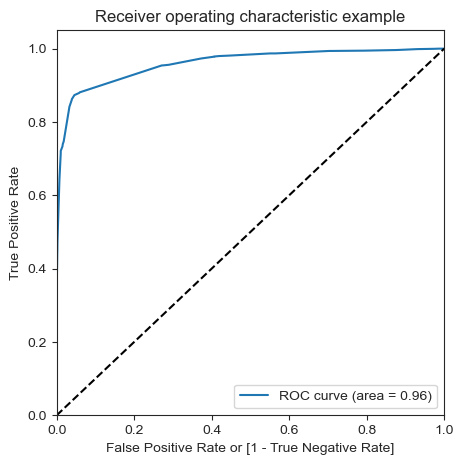

In [159]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# ROC curve should be a value closer to 1 for a good model. We have got a value of 0.96 which is extremely good.

### Optimal Cut-Off

In [161]:
#Creating columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
9196          1        0.091071         9196          0    1    0    0    0   
4696          0        0.050738         4696          0    1    0    0    0   
3274          0        0.740706         3274          1    1    1    1    1   
2164          0        0.004365         2164          0    1    0    0    0   
1667          1        0.958296         1667          1    1    1    1    1   

      0.4  0.5  0.6  0.7  0.8  0.9  
9196    0    0    0    0    0    0  
4696    0    0    0    0    0    0  
3274    1    1    1    1    0    0  
2164    0    0    0    0    0    0  
1667    1    1    1    1    1    1

In [162]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cut_off_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.758896  0.973166  0.627254
0.2   0.2  0.917664  0.880922  0.940237
0.3   0.3  0.923408  0.873375  0.954147
0.4   0.4  0.922770  0.860797  0.960845
0.5   0.5  0.922770  0.860797  0.960845
0.6   0.6  0.922770  0.860797  0.960845
0.7   0.7  0.918781  0.839832  0.967285
0.8   0.8  0.891336  0.740461  0.984029
0.9   0.9  0.885910  0.717400  0.989438


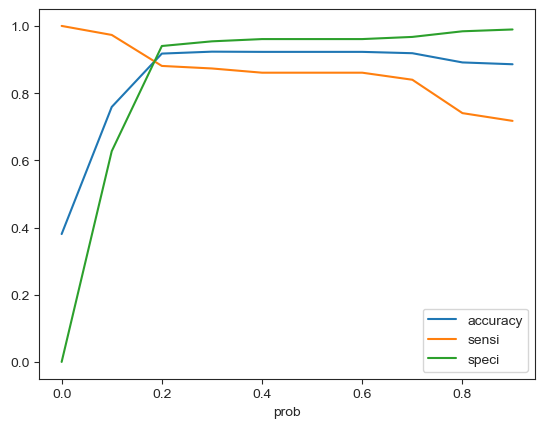

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### As we see from the above line plot, 0.2 seems to be the most ideal cut-off point.

In [165]:
#using 0.2 as cut-off point for predicting lead conversion

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
9196          1        0.091071         9196          0    1    0    0    0   
4696          0        0.050738         4696          0    1    0    0    0   
3274          0        0.740706         3274          1    1    1    1    1   
2164          0        0.004365         2164          0    1    0    0    0   
1667          1        0.958296         1667          1    1    1    1    1   

      0.4  0.5  0.6  0.7  0.8  0.9  final_Predicted  
9196    0    0    0    0    0    0                0  
4696    0    0    0    0    0    0                0  
3274    1    1    1    1    0    0                1  
2164    0    0    0    0    0    0                0  
1667    1    1    1    1    1    1                1

In [166]:
#calculating the lead score for each lead and displaying only required columns

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
9196          1        0.091071         9196                0           9
4696          0        0.050738         4696                0           5
3274          0        0.740706         3274                1          74
2164          0        0.004365         2164                0           0
1667          1        0.958296         1667                1          96

In [167]:
#calculating the overall accuracy using optimal cut-off

accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
accuracy

0.9176639540449976

In [168]:
#creating confusion matrix for new cut-off 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3650,  232],
       [ 284, 2101]])

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
#sensitivity
sensitivity = TP / float(TP+FN)
sensitivity

0.8809224318658281

In [171]:
#specificity
specificity = TN / float(TN+FP)
specificity

0.9402369912416281

In [172]:
#False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.059763008758371976


In [173]:
#Positive predictive value 
print (TP / float(TP+FP))

0.9005572224603515


In [174]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9278088459583121


In [175]:
#Precision
TP / TP + FP

# confusion[1,1]/(confusion[0,1]+confusion[1,1])

233.0

In [176]:
#Recall
TP / TP + FN

# confusion[1,1]/(confusion[1,0]+confusion[1,1])

285.0

In [177]:
#calculating precision and recall values using the inbuilt library functions

from sklearn.metrics import precision_score, recall_score

In [178]:
precision = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
precision

0.9005572224603515

In [179]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
recall

0.8809224318658281

In [180]:
print('8. Final Analysis On Training Dataset')
print('******************************')
print(TN,' ',FP)
print(FN,' ',TP)
print('******************************')
print('Accuracy -->', round(accuracy*100,2))
print('Sensitivity -->',round(sensitivity*100,2))
print('Specificity -->',round(specificity*100,2))
print('Precision -->',round(precision*100,2))
print('Recall -->',round(recall*100,2))

8. Final Analysis On Training Dataset
******************************
3650   232
284   2101
******************************
Accuracy --> 91.77
Sensitivity --> 88.09
Specificity --> 94.02
Precision --> 90.06
Recall --> 88.09


In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
#plotting recall and precision curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

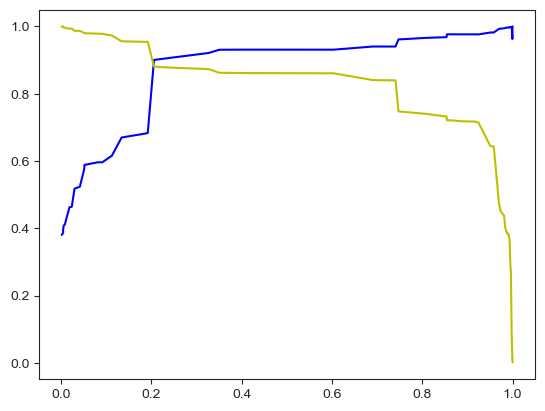

In [183]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

### Analysis On Training Dataset
- Our model seems to be performing very well as our ROC curve has a value of 0.96 which is extremely good.
- Some important statistics of our model:
    - Accuracy --> 91.77
    - Sensitivity --> 88.09
    - Specificity --> 94.02
    - Precision --> 90.06
    - Recall --> 88.09

## Making Predictions On Test Dataset With Model Built From Training Dataset

### Rescaling the Test Dataset Values

In [185]:
#extracting the numerical columns and assigning them to a variable

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

#scaling the test dataset values

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

#displaying the dataframe with scaled data

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7681     0.575687                    -0.311318              0.092860   
984     -0.090676                    -0.550262              0.356568   
8135    -0.423857                     0.812462             -0.170849   
6915     0.242505                    -0.628665             -0.170849   
2712    -0.090676                    -0.421456              0.356568   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7681                                    1                          0   
984                                     1                          0   
8135                                    1                          0   
6915                                    1                          0   
2712                                    0                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
7681                        0                                          0   
984                         0                                          0   
8135                        0                                          0   
6915                        0                                          0   
2712                        0                                          0   

      What is your current occupation_Other  \
7681                                      0   
984                                       0   
8135                                      0   
6915                                      0   
2712                                      0   

      What is your current occupation_Student  \
7681                                        0   
984                                         0   
8135                                        0   
6915                                        0   
2712                                        0   

      What is your current occupation_Unemployed  ...  Tags_Lost to EINS  \
7681                                           1  ...                  0   
984                                            1  ...                  0   
8135                                           1  ...                  0   
6915                                           1  ...                  0   
2712                                           1  ...                  0   

      Tags_Not Specified  Tags_Ringing  \
7681                   0             1   
984                    0             0   
8135                   1             0   
6915                   0             1   
2712                   0             0   

      Tags_Will revert after reading the email  \
7681                                         0   
984                                          0   
8135                                         0   
6915                                         0   
2712                                         1   

      Last Notable Activity_Email Link Clicked  \
7681                                         0   
984                                          0   
8135                                         0   
6915                                         0   
2712                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7681                                   0                               0   
984                                    0                               1   
8135                                   0                               0   
6915                                   1                               0   
2712                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
7681                                              0   
984                                               0   
8135                                              0   
6915                                              0   
2712                                              0   

     

In [186]:
#choosing the columns in test dataset which were chosen by RFE for building our model

X_test = X_test[rfe_col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
7681                          0                           1   
984                           0                           0   
8135                          0                           1   
6915                          0                           0   
2712                          0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
7681                             0                            0   
984                              0                            0   
8135                             0                            0   
6915                             0                            0   
2712                             0                            0   

      Last Activity_Olark Chat Conversation  Tags_Busy  \
7681                                      0          0   
984                                       0          0   
8135                                      0          0   
6915                                      0          0   
2712                                      0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Not Specified  \
7681                        0                  0                   0   
984                         0                  0                   0   
8135                        0                  0                   1   
6915                        0                  0                   0   
2712                        0                  0                   0   

      Tags_Ringing  Tags_Will revert after reading the email  \
7681             1                                         0   
984              0                                         0   
8135             0                                         0   
6915             1                                         0   
2712             0                                         1   

      Last Notable Activity_SMS Sent  
7681                               1  
984                                0  
8135                               1  
6915                               0  
2712                               0

### Predicting the Test Data Values

In [187]:
#adding a constant 

X_test_sm = sm.add_constant(X_test)

In [188]:
#predicting the values in test dataset based on model built on training dataset

y_test_pred = res5.predict(X_test_sm)

In [189]:
y_test_pred[:10]

7681    0.050738
984     0.023517
8135    0.603783
6915    0.008257
2712    0.958296
244     0.008257
4698    0.023517
8287    0.041422
6791    0.958296
8970    0.023517
dtype: float64

In [190]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
y_pred_1.head()

0
7681  0.050738
984   0.023517
8135  0.603783
6915  0.008257
2712  0.958296

In [192]:
#converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [193]:
#creating a new column 'Prospect ID' using the index values

y_test_df['Prospect ID'] = y_test_df.index

In [194]:
#removing index from both datasets to append them by column

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
#appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
#checking the dataframe head

y_pred_final.head()

Converted  Prospect ID         0
0          0         7681  0.050738
1          0          984  0.023517
2          0         8135  0.603783
3          0         6915  0.008257
4          1         2712  0.958296

In [197]:
#renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [198]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         7681        0.050738
1          0          984        0.023517
2          0         8135        0.603783
3          0         6915        0.008257
4          1         2712        0.958296

In [199]:
#assigning probabability score based on cutoff of 0.2

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [200]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob  final_Predicted
0          0         7681        0.050738                0
1          0          984        0.023517                0
2          0         8135        0.603783                1
3          0         6915        0.008257                0
4          1         2712        0.958296                1

In [201]:
#checking the overall accuracy

accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)
accuracy

0.9225614296351452

###  Confusion Matrix

In [202]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1582,   94],
       [ 114,  896]])

In [203]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [204]:
#Sensitivity
sensitivity = TP / float(TP+FN)
sensitivity

0.8871287128712871

In [205]:
#Specificity
specificity = TN / float(TN+FP)
specificity

0.9439140811455847

In [206]:
#Precision

precision = precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)
precision

0.9050505050505051

In [207]:
#Recall

recall = recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)
recall

0.8871287128712871

In [208]:
print('4. Final Analysis On Test Dataset')
print('******************************')
print(TN,' ',FP)
print(FN,' ',TP)
print('******************************')
print('Accuracy -->', round(accuracy*100,2))
print('Sensitivity -->',round(sensitivity*100,2))
print('Specificity -->',round(specificity*100,2))
print('Precision -->',round(precision*100,2))
print('Recall -->',round(recall*100,2))

4. Final Analysis On Test Dataset
******************************
1582   94
114   896
******************************
Accuracy --> 92.26
Sensitivity --> 88.71
Specificity --> 94.39
Precision --> 90.51
Recall --> 88.71


###  Final Analysis On Test Dataset
- Upon running the trained model on the test dataset we obtain the following figures:
     - Accuracy --> 92.26
    - Sensitivity --> 88.71
    - Specificity --> 94.39
    - Precision --> 90.51
    - Recall --> 88.71

##  Conclusion

### Variables to be focussed on for bettering the lead conversion ratio:

- Lead Source_Welingak Website
- Tags_Closed by Horizzon
- Last Activity_Email Bounced
- Tags_Busy
- Tags_Lost to EINS
- Lead Origin_Lead Add Form
- Last Activity_Olark Chat Conversation
- Last Notable Activity_SMS Sent
- Lead Source_Direct Traffic
- Tags_Will revert after reading the email
- Tags_Ringing
- Tags_Not Specified

### Comparing the values obtained by our Train and Test dataset:
- Train Dataset
    - Accuracy --> 91.77
    - Sensitivity --> 88.09
    - Specificity --> 94.02
    - Precision --> 90.06
    - Recall --> 88.09
     
- Test Dataset
    - Accuracy --> 92.26
    - Sensitivity --> 88.71
    - Specificity --> 94.39
    - Precision --> 90.51
    - Recall --> 88.71